# **ENS492: Project Implementation**

The aim of this project is to build a machine learning model to predict the ful cnsumprion of heavy duty trucks.
The srages to this project inludes;

## **Data preprocessing**

Clean the data for processing.


## **Feature Engineeering**

Use sliding windows and extract fearurea from each window.

## **Feature Subset selection**

Select the best subset of the dataset. using the correlation of the data to the target output.

## **Modelling and Evaluation**
Build the Machine learning model using XGboost and Evaluate the performances of each model.

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
folder_path =  '/content/data'

# **Missing Data**

In [ ]:
#"BrakePedalPos" column is used to show if the break pedal is being used hence when it nan it is actually 0
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)

    # Check if the item in the folder is a file
    if os.path.isfile(file_path):
        #print(f"Processing file: {filename}")

        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Fill missing values in the "BrakePedalPos" column with 0
        df['BrakePedalPos'].fillna(0, inplace=True)

        # Save the DataFrame back to the file, overwriting the original file
        df.to_csv(file_path, index=False)

        print(f"Filling completed for file: {filename}")

print("Filling completed for all files.")

Filling completed for file: Record427.csv
Filling completed for file: Record415.csv
Filling completed for file: Record13.csv
Filling completed for file: Record114.csv
Filling completed for file: Record80.csv
Filling completed for file: Record351.csv
Filling completed for file: Record370.csv
Filling completed for file: Record103.csv
Filling completed for file: Record423.csv
Filling completed for file: Record143.csv
Filling completed for file: Record446.csv
Filling completed for file: Record188.csv
Filling completed for file: Record251.csv
Filling completed for file: Record459.csv
Filling completed for file: Record177.csv
Filling completed for file: Record70.csv
Filling completed for file: Record138.csv
Filling completed for file: Record455.csv
Filling completed for file: Record135.csv
Filling completed for file: Record111.csv
Filling completed for file: Record458.csv
Filling completed for file: Record20.csv
Filling completed for file: Record207.csv
Filling completed for file: Record21.c

In [ ]:
import pandas as pd
import plotly.express as px

# Read the sample data
sample = pd.read_csv("/content/data/Record1.csv")

# Define columns to ignore
columns_to_ignore = ['DateTime', 'VehicleID']

# Remove columns to ignore from the DataFrame
sample_filtered = sample.drop(columns=columns_to_ignore)

# Calculate the total number of data points in the remaining dataset
total_data_points = sample['VehicleID'].count()

# Calculate the number of missing values in each column
missing_values = sample_filtered.isnull().sum()

# Calculate the percentage of missing values in each column based on total data points
percentage_missing = (missing_values / total_data_points) * 100

# Convert Series to DataFrame for compatibility with Plotly
percentage_missing_df = percentage_missing.reset_index()
percentage_missing_df.columns = ['Signal', 'Percentage Missing']

# Plotting using Plotly
fig = px.bar(percentage_missing_df, x='Signal', y='Percentage Missing',
             title='Percentage of Missing Data in Each Signal before data interpolation and filling',
             labels={'Signal': 'Signals', 'Percentage Missing': 'Percentage of Missing Data'})
fig.update_xaxes(tickangle=45)
fig.show()


In [ ]:
# Function to perform linear interpolation and forward filling to compute missing data
def interpolate_and_forward_fill(directory):
    """
    Interpolates missing data and performs forward filling for all CSV files in the specified directory.

    Args:
        directory (str): Path to the directory containing CSV files.
    """
    # List files in the directory
    files = os.listdir(directory)

    # Loop over each file in the directory
    for file in files:
        if file.endswith('.csv'):  # Check if file is a CSV file
            # Load the file into a DataFrame
            filepath = os.path.join(directory, file)
            df = pd.read_csv(filepath)

            # Interpolate missing values
            df_interpolated = df.interpolate(method='linear')

            # Perform forward filling for any remaining missing values
            df_filled = df_interpolated.ffill()

            # Save the changes back to the original file
            df_filled.to_csv(filepath, index=False)

            print(f"Filling completed for file: {file}")
    print("Finished filling files")

In [ ]:
# Fillin missing data
interpolate_and_forward_fill(folder_path)

Filling completed for file: Record427.csv
Filling completed for file: Record415.csv
Filling completed for file: Record13.csv
Filling completed for file: Record114.csv
Filling completed for file: Record80.csv
Filling completed for file: Record351.csv
Filling completed for file: Record370.csv
Filling completed for file: Record103.csv
Filling completed for file: Record423.csv
Filling completed for file: Record143.csv
Filling completed for file: Record446.csv
Filling completed for file: Record188.csv
Filling completed for file: Record251.csv
Filling completed for file: Record459.csv
Filling completed for file: Record177.csv
Filling completed for file: Record70.csv
Filling completed for file: Record138.csv
Filling completed for file: Record455.csv
Filling completed for file: Record135.csv
Filling completed for file: Record111.csv
Filling completed for file: Record458.csv
Filling completed for file: Record20.csv
Filling completed for file: Record207.csv
Filling completed for file: Record21.c

In [ ]:
import pandas as pd
import plotly.express as px

# Read the sample data
sample = pd.read_csv("/content/data/Record1.csv")

# Define columns to ignore
columns_to_ignore = ['DateTime', 'VehicleID']

# Remove columns to ignore from the DataFrame
sample_filtered = sample.drop(columns=columns_to_ignore)

# Calculate the total number of data points in the remaining dataset
total_data_points = sample['VehicleID'].count()

# Calculate the number of missing values in each column
missing_values = sample_filtered.isnull().sum()

# Calculate the percentage of missing values in each column based on total data points
percentage_missing = (missing_values / total_data_points) * 100

# Convert Series to DataFrame for compatibility with Plotly
percentage_missing_df = percentage_missing.reset_index()
percentage_missing_df.columns = ['Signal', 'Percentage Missing']

# Plotting using Plotly
fig = px.bar(percentage_missing_df, x='Signal', y='Percentage Missing',
             title='Percentage of Missing Data in Each Signal before data interpolation and filling',
             labels={'Signal': 'Signals', 'Percentage Missing': 'Percentage of Missing Data'})
fig.update_xaxes(tickangle=45)
fig.show()

In [ ]:
# Drop rows with missing data
# List files in the directory
files = os.listdir(folder_path)

# Loop over each file in the directory
for file in files:
    if file.endswith('.csv'):  # Check if file is a CSV file
        # Load the file into a DataFrame
        filepath = os.path.join(folder_path, file)
        df = pd.read_csv(filepath)

        # Drop rows with missing data
        df_cleaned = df.dropna()

        # Save the cleaned DataFrame back to the original file
        df_cleaned.to_csv(filepath, index=False)
print("All missing rows in each file dropped")

All missing rows in each file dropped


# **Feature Engineering**

In [ ]:
df.columns

Index(['DateTime', 'VehicleID', 'HghRslutionTotalVehicleDistance',
       'TachographVehicleSpeed', 'EngSpeed', 'ActualEngPercentTorque',
       'AccelPedalPos1', 'BrakePedalPos', 'PCCM_Slope', 'DStgy_dmRdcAgAct',
       'EngOilTemp1', 'EngCoolantTemp', 'GrossCombinationVehicleWeight',
       'EngTotalFuelUsed'],
      dtype='object')

In [ ]:
# Get a list of all files in the data folder
file_list = os.listdir(folder_path)

# Loop through each file
for file_name in file_list:
    # Check if the file is a CSV file
    if file_name.endswith('.csv'):
        # Load the file into a DataFrame
        df = pd.read_csv(os.path.join(folder_path, file_name))

        # Perform the operation
        df['slope_positive'] = (df['PCCM_Slope'] > 0).astype(int)
        df['slope_negative'] = (df['PCCM_Slope'] < 0).astype(int)

        # Save the modified DataFrame back to the original file
        df.to_csv(os.path.join(folder_path, file_name), index=False)



In [ ]:
df.head()

DateTime  VehicleID  HghRslutionTotalVehicleDistance  \
0  2015-10-18 11:55:30.000        129                              NaN   
1  2015-10-18 11:55:32.000        129                              NaN   
2  2015-10-18 11:55:34.000        129                              NaN   
3  2015-10-18 11:55:34.800        129                              NaN   
4  2015-10-18 11:55:35.000        129                              NaN   

   TachographVehicleSpeed    EngSpeed  ActualEngPercentTorque  AccelPedalPos1  \
0                     0.0  550.500000                    7.00             0.0   
1                     0.0  550.500000                    6.75             6.1   
2                     0.0  551.000000                    6.50            12.2   
3                     0.0  571.666667                    6.25            18.3   
4                     0.0  592.333333                    6.00            24.4   

   BrakePedalPos  PCCM_Slope  DStgy_dmRdcAgAct  EngOilTemp1  EngCoolantTemp  \
0            0.0         NaN               0.0          NaN        0.636364   
1            0.0         0.0               0.0          NaN        0.636364   
2            0.0         0.0               0.0          NaN        0.636364   
3            0.0         0.0               0.0          NaN        0.636364   
4            0.0         0.0               0.0          NaN        0.636364   

   GrossCombinationVehicleWeight  EngTotalFuelUsed  slope_positive  \
0                            NaN               NaN               0   
1                            NaN               NaN               0   
2                            NaN               NaN               0   
3                            NaN               NaN               0   
4                            NaN               NaN               0   

   slope_negative  
0               0  
1               0  
2               0  
3               0  
4               0

In [ ]:
# Function to generate sliding windows
def sliding_windows(data, window_size, shift):
    num_windows = ((len(data) - window_size) // shift) + 1
    for i in range(num_windows):
        yield data[i * shift:i * shift + window_size]

# Function to extract features from a window
def extract_features(window, column_name):
    features = {}
    features['mean'] = np.mean(window)
    features['median'] = np.median(window)
    features['max'] = np.max(window)
    features['min'] = np.min(window)
    features['std'] = np.std(window)
    features['range'] = round(np.max(window) - np.min(window), 6)
    return features


In [ ]:
# Create an empty list to store DataFrames for each file
import os
import pandas as pd

# Define the folder path containing the CSV files


# Define a list to store the DataFrames
dfs = []
# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):  # Adjust file extension if necessary
        file_path = os.path.join(folder_path, filename)

        # Print the current file being processed
        print("Processing file:", filename)

        # Load the file into a DataFrame
        temp_df = pd.read_csv(file_path)

        # Assuming 'DateTime' is the column with datetime values
        temp_df['DateTime'] = pd.to_datetime(temp_df['DateTime'])  # Convert to datetime if not already

        # Sort the DataFrame by datetime column
        temp_df.sort_values(by='DateTime', inplace=True)

        # Iterate over the columns to create sliding windows and features
        for column in ['HghRslutionTotalVehicleDistance',
                       'TachographVehicleSpeed', 'EngSpeed',
                       'ActualEngPercentTorque', 'AccelPedalPos1',
                       'BrakePedalPos', 'PCCM_Slope', 'DStgy_dmRdcAgAct',
                       'EngOilTemp1', 'EngCoolantTemp', 'GrossCombinationVehicleWeight',
                       'EngTotalFuelUsed' , 'slope_negative' , 'slope_negative']:

            # Convert the column to numeric if needed
            temp_df[column] = pd.to_numeric(temp_df[column], errors='coerce')

            # Remove rows with NaN values
            temp_df.dropna(subset=[column], inplace=True)

            # Convert window size and shift from minutes to seconds
            window_size_seconds = 10 * 60  # 5 minutes window
            shift_seconds = 2 * 60  # 1 minute shift

            # Generate sliding windows
            for i in range(0, len(temp_df) - window_size_seconds + 1, shift_seconds):
                window_data = temp_df[column].iloc[i:i + window_size_seconds]  # Extract window data
                # Extract features from the window
                features = extract_features(window_data, column)
                # Add the features as new columns to the original DataFrame
                for feature_name, value in features.items():
                    temp_df.loc[i, f"{column}_{feature_name}"] = value

        temp_df = temp_df.dropna()
        print("Processed file:", filename)

        # Append the processed DataFrame to the list
        dfs.append(temp_df)

# Concatenate all DataFrames in the list into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

print("File processing completed")

Processing file: Record97.csv
Processed file: Record97.csv
Processing file: Record29.csv
Processed file: Record29.csv
Processing file: Record362.csv
Processed file: Record362.csv
Processing file: Record36.csv
Processed file: Record36.csv
Processing file: Record19.csv
Processed file: Record19.csv
Processing file: Record6.csv
Processed file: Record6.csv
Processing file: Record224.csv
Processed file: Record224.csv
Processing file: Record270.csv
Processed file: Record270.csv
Processing file: Record331.csv
Processed file: Record331.csv
Processing file: Record301.csv
Processed file: Record301.csv
Processing file: Record26.csv
Processed file: Record26.csv
Processing file: Record120.csv
Processed file: Record120.csv
Processing file: Record113.csv
Processed file: Record113.csv
Processing file: Record305.csv
Processed file: Record305.csv
Processing file: Record281.csv
Processed file: Record281.csv
Processing file: Record356.csv
Processed file: Record356.csv
Processing file: Record413.csv
Process

In [ ]:
df.head()

DateTime  VehicleID  HghRslutionTotalVehicleDistance  \
0  2015-10-18 11:55:30.000        129                              NaN   
1  2015-10-18 11:55:32.000        129                              NaN   
2  2015-10-18 11:55:34.000        129                              NaN   
3  2015-10-18 11:55:34.800        129                              NaN   
4  2015-10-18 11:55:35.000        129                              NaN   

   TachographVehicleSpeed    EngSpeed  ActualEngPercentTorque  AccelPedalPos1  \
0                     0.0  550.500000                    7.00             0.0   
1                     0.0  550.500000                    6.75             6.1   
2                     0.0  551.000000                    6.50            12.2   
3                     0.0  571.666667                    6.25            18.3   
4                     0.0  592.333333                    6.00            24.4   

   BrakePedalPos  PCCM_Slope  DStgy_dmRdcAgAct  EngOilTemp1  EngCoolantTemp  \
0            0.0         NaN               0.0          NaN        0.636364   
1            0.0         0.0               0.0          NaN        0.636364   
2            0.0         0.0               0.0          NaN        0.636364   
3            0.0         0.0               0.0          NaN        0.636364   
4            0.0         0.0               0.0          NaN        0.636364   

   GrossCombinationVehicleWeight  EngTotalFuelUsed  slope_positive  \
0                            NaN               NaN               0   
1                            NaN               NaN               0   
2                            NaN               NaN               0   
3                            NaN               NaN               0   
4                            NaN               NaN               0   

   slope_negative  
0               0  
1               0  
2               0  
3               0  
4               0

In [ ]:
df.columns


Index(['DateTime', 'VehicleID', 'HghRslutionTotalVehicleDistance',
       'TachographVehicleSpeed', 'EngSpeed', 'ActualEngPercentTorque',
       'AccelPedalPos1', 'BrakePedalPos', 'PCCM_Slope', 'DStgy_dmRdcAgAct',
       'EngOilTemp1', 'EngCoolantTemp', 'GrossCombinationVehicleWeight',
       'EngTotalFuelUsed', 'slope_positive', 'slope_negative'],
      dtype='object')

In [ ]:
df = pd.concat(dfs, ignore_index=True)

# Remove all rows with empty values
df = df.dropna()

# Remove all empty rows
df = df.dropna(how='all')

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

In [ ]:
df.size

986906

In [ ]:
df_size = df['VehicleID'].count()
print(df_size)

10499


In [ ]:
df.head()

DateTime VehicleID  HghRslutionTotalVehicleDistance  \
0 2015-11-08 18:32:53.200        25                     2.577191e+08   
1 2015-11-08 18:35:11.400        25                     2.577223e+08   
2 2015-11-08 18:36:28.200        25                     2.577237e+08   
3 2015-11-08 18:38:49.200        25                     2.577272e+08   
4 2015-11-08 18:41:15.400        25                     2.577308e+08   

   TachographVehicleSpeed  EngSpeed  ActualEngPercentTorque  AccelPedalPos1  \
0               90.296875  1231.000                    20.0            36.0   
1               83.832031   880.625                    15.0             1.6   
2               59.199219  1365.000                    86.0            78.0   
3               89.624023  1225.500                    34.0            31.7   
4               89.798828  1227.000                    73.5            66.8   

   BrakePedalPos  PCCM_Slope  DStgy_dmRdcAgAct  ...  EngTotalFuelUsed_max  \
0            0.0   -0.750000          0.431887  ...          11394.284910   
1            0.0    0.500000          0.147859  ...          11394.334439   
2            0.0    2.125000          1.904163  ...          11394.448268   
3            0.0    0.166667          0.486670  ...          11394.699866   
4            0.0    1.958333          2.342781  ...          11394.984549   

   EngTotalFuelUsed_min  EngTotalFuelUsed_std  EngTotalFuelUsed_range  \
0          11393.659284              0.184906                0.625626   
1          11393.751154              0.189381                0.583285   
2          11393.862882              0.172824                0.585385   
3          11393.967671              0.170541                0.732195   
4          11394.154972              0.237408                0.829577   

  slope_negative_mean  slope_negative_median  slope_negative_max  \
0               0.285                    0.0                 1.0   
1               0.375                    0.0                 1.0   
2               0.375                    0.0                 1.0   
3               0.290                    0.0                 1.0   
4               0.265                    0.0                 1.0   

   slope_negative_min  slope_negative_std  slope_negative_range  
0                 0.0            0.451414                   1.0  
1                 0.0            0.484123                   1.0  
2                 0.0            0.484123                   1.0  
3                 0.0            0.453762                   1.0  
4                 0.0            0.441333                   1.0  

[5 rows x 94 columns]

In [ ]:
# Save as CSV
df.to_csv('Final.csv', index=False)

In [ ]:
#Import saved file
df = pd.read_csv("/content/Final_Un.csv")

In [ ]:
df.head()

DateTime  VehicleID  HghRslutionTotalVehicleDistance  \
0  2015-10-18 09:07:00.600        142                     2.402162e+08   
1  2015-10-18 09:08:15.600        142                     2.402181e+08   
2  2015-10-18 09:09:22.200        142                     2.402196e+08   
3  2015-10-18 09:10:33.600        142                     2.402213e+08   
4  2015-10-18 09:11:33.600        142                     2.402227e+08   

   TachographVehicleSpeed  EngSpeed  ActualEngPercentTorque  AccelPedalPos1  \
0               90.199219   1222.00                    17.0            31.2   
1               89.296875   1210.25                    81.0            74.0   
2               77.498047   1259.00                    92.5            88.6   
3               89.849609   1218.00                    28.5            27.4   
4               81.748047   1105.00                    67.5            62.2   

   BrakePedalPos  PCCM_Slope  DStgy_dmRdcAgAct  ...  EngTotalFuelUsed_max  \
0            0.0   -0.750000          0.031355  ...          10813.078704   
1            0.0    2.375000          0.000000  ...          10813.078704   
2            0.0    3.583333          3.122675  ...          10813.078704   
3            0.0   -0.500000          0.215943  ...          10813.078704   
4            0.0    2.375000          0.964039  ...          10813.078704   

   EngTotalFuelUsed_min  EngTotalFuelUsed_std  EngTotalFuelUsed_range  \
0          10812.531281              0.193906                0.547422   
1          10812.570383              0.160016                0.508321   
2          10812.752408              0.103463                0.326296   
3          10812.886454              0.055812                0.192250   
4          10813.019731              0.009444                0.058973   

   slope_negative_mean  slope_negative_median  slope_negative_max  \
0             0.353333                    0.0                 1.0   
1             0.400000                    0.0                 1.0   
2             0.600000                    1.0                 1.0   
3             0.710000                    1.0                 1.0   
4             0.893333                    1.0                 1.0   

   slope_negative_min  slope_negative_std  slope_negative_range  
0                 0.0            0.478005                   1.0  
1                 0.0            0.489898                   1.0  
2                 0.0            0.489898                   1.0  
3                 0.0            0.453762                   1.0  
4                 0.0            0.308689                   1.0  

[5 rows x 94 columns]

In [ ]:
df_size = df['VehicleID'].count()
print(df_size)

23058


In [ ]:
columns_to_drop = ['DateTime'	, 'VehicleID' , 'HghRslutionTotalVehicleDistance',
       'TachographVehicleSpeed', 'EngSpeed', 'ActualEngPercentTorque',
       'AccelPedalPos1', 'BrakePedalPos', 'PCCM_Slope', 'DStgy_dmRdcAgAct',
       'EngOilTemp1', 'EngCoolantTemp', 'GrossCombinationVehicleWeight',
       'EngTotalFuelUsed' ,
       'EngTotalFuelUsed_mean' , 'EngTotalFuelUsed_std' , 'EngTotalFuelUsed_min' , 'EngTotalFuelUsed_max' , 'EngTotalFuelUsed_median',
       'HghRslutionTotalVehicleDistance_mean',
       'HghRslutionTotalVehicleDistance_median',
       'HghRslutionTotalVehicleDistance_max',
       'HghRslutionTotalVehicleDistance_min',
       'HghRslutionTotalVehicleDistance_std'
       ]
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head(5)

slope_positive  slope_negative  HghRslutionTotalVehicleDistance_range  \
0               0               1                            7563.064516   
1               1               0                            6627.500000   
2               1               0                            6057.500000   
3               0               1                            5708.684211   
4               1               0                            4740.971660   

   TachographVehicleSpeed_mean  TachographVehicleSpeed_median  \
0                    85.557143                      85.548503   
1                    83.978454                      83.236514   
2                    85.020485                      83.988002   
3                    86.064264                      86.064887   
4                    86.989820                      88.650725   

   TachographVehicleSpeed_max  TachographVehicleSpeed_min  \
0                   90.796875                   76.699219   
1                   90.796875                   76.699219   
2                   90.796875                   76.699219   
3                   91.398438                   80.699219   
4                   91.398438                   80.699219   

   TachographVehicleSpeed_std  TachographVehicleSpeed_range  EngSpeed_mean  \
0                    4.224392                     14.097656    1211.609167   
1                    3.680753                     14.097656    1195.215000   
2                    3.608674                     14.097656    1170.308333   
3                    3.502293                     10.699219    1169.174643   
4                    3.352061                     10.699219    1182.308056   

   ...  GrossCombinationVehicleWeight_min  GrossCombinationVehicleWeight_std  \
0  ...                           0.524667                       1.559171e-03   
1  ...                           0.524667                       1.262640e-03   
2  ...                           0.526071                       3.777313e-04   
3  ...                           0.528061                       1.110223e-16   
4  ...                           0.528061                       1.110223e-16   

   GrossCombinationVehicleWeight_range  EngTotalFuelUsed_range  \
0                             0.003393                0.547422   
1                             0.003393                0.508321   
2                             0.001989                0.326296   
3                             0.000000                0.192250   
4                             0.000000                0.058973   

   slope_negative_mean  slope_negative_median  slope_negative_max  \
0             0.353333                    0.0                 1.0   
1             0.400000                    0.0                 1.0   
2             0.600000                    1.0                 1.0   
3             0.710000                    1.0                 1.0   
4             0.893333                    1.0                 1.0   

   slope_negative_min  slope_negative_std  slope_negative_range  
0                 0.0            0.478005                   1.0  
1                 0.0            0.489898                   1.0  
2                 0.0            0.489898                   1.0  
3                 0.0            0.453762                   1.0  
4                 0.0            0.308689                   1.0  

[5 rows x 70 columns]

Text(0, 0.5, 'Fuel Consumed')

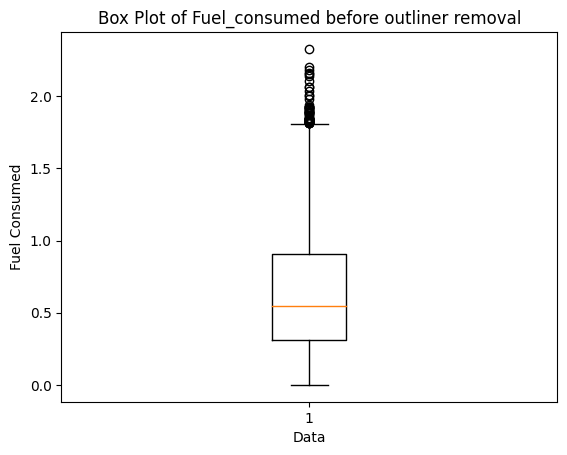

In [ ]:
# Create a box plot
plt.boxplot(df["EngTotalFuelUsed_range"])

# Add title and labels
plt.title('Box Plot of Fuel_consumed before outliner removal')
plt.xlabel('Data')
plt.ylabel('Fuel Consumed')

In [ ]:
df["Fuel_consumed/100km"] = (df['EngTotalFuelUsed_range']*10**5) / df['HghRslutionTotalVehicleDistance_range']

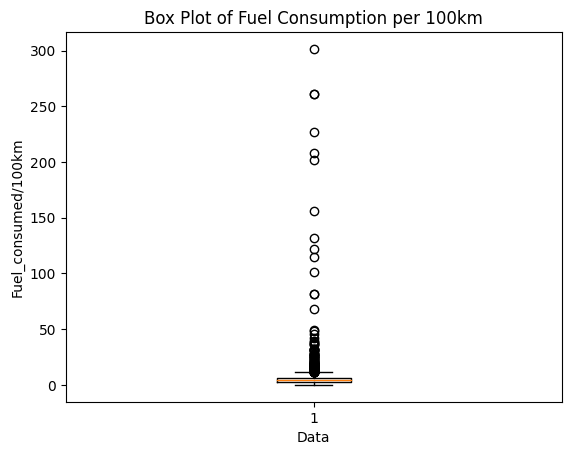

In [ ]:
# Create a box plot
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Create a copy of the column without modifying the original data
data = df["Fuel_consumed/100km"].copy()

# Filter out NaN values
data = data.dropna()

# Create a box plot
plt.boxplot(data)

# Add title and labels
plt.title('Box Plot of Fuel Consumption per 100km')
plt.xlabel('Data')
plt.ylabel("Fuel_consumed/100km")

# Show the plot
plt.show()


In [ ]:
df["Fuel_consumed/weight"] = df["EngTotalFuelUsed_range"] / df["GrossCombinationVehicleWeight_mean"]

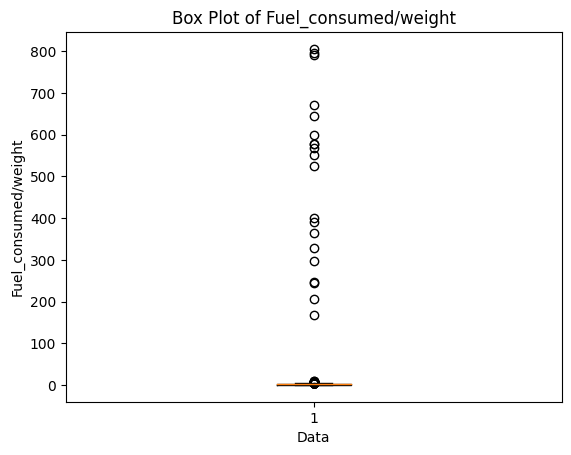

In [ ]:
# Create a box plot
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Create a copy of the column without modifying the original data
data = df["Fuel_consumed/weight"].copy()

# Filter out NaN values
data = data.dropna()

# Create a box plot
plt.boxplot(data)

# Add title and labels
plt.title("Box Plot of Fuel_consumed/weight")
plt.xlabel('Data')
plt.ylabel("Fuel_consumed/weight")

# Show the plot
plt.show()


In [ ]:
# Drop rows with infinity values in any column
#df = df.replace([np.inf, -np.inf], np.nan).dropna()

In [ ]:
df.columns

Index(['slope_positive', 'slope_negative',
       'HghRslutionTotalVehicleDistance_range', 'TachographVehicleSpeed_mean',
       'TachographVehicleSpeed_median', 'TachographVehicleSpeed_max',
       'TachographVehicleSpeed_min', 'TachographVehicleSpeed_std',
       'TachographVehicleSpeed_range', 'EngSpeed_mean', 'EngSpeed_median',
       'EngSpeed_max', 'EngSpeed_min', 'EngSpeed_std', 'EngSpeed_range',
       'ActualEngPercentTorque_mean', 'ActualEngPercentTorque_median',
       'ActualEngPercentTorque_max', 'ActualEngPercentTorque_min',
       'ActualEngPercentTorque_std', 'ActualEngPercentTorque_range',
       'AccelPedalPos1_mean', 'AccelPedalPos1_median', 'AccelPedalPos1_max',
       'AccelPedalPos1_min', 'AccelPedalPos1_std', 'AccelPedalPos1_range',
       'BrakePedalPos_mean', 'BrakePedalPos_median', 'BrakePedalPos_max',
       'BrakePedalPos_min', 'BrakePedalPos_std', 'BrakePedalPos_range',
       'PCCM_Slope_mean', 'PCCM_Slope_median', 'PCCM_Slope_max',
       'PCCM_Slope_min'

In [ ]:
cols = [
    'slope_positive', 'slope_negative' , 'slope_negative_mean', 'slope_negative_median', 'slope_negative_max',
      'slope_negative_min', 'slope_negative_std', 'slope_negative_range',
    'HghRslutionTotalVehicleDistance_range',
       'TachographVehicleSpeed_mean', 'TachographVehicleSpeed_median',
       'TachographVehicleSpeed_max', 'TachographVehicleSpeed_min',
       'TachographVehicleSpeed_std', 'TachographVehicleSpeed_range',
       'EngSpeed_mean', 'EngSpeed_median', 'EngSpeed_max', 'EngSpeed_min',
       'EngSpeed_std', 'EngSpeed_range', 'ActualEngPercentTorque_mean',
       'ActualEngPercentTorque_median', 'ActualEngPercentTorque_max',
       'ActualEngPercentTorque_min', 'ActualEngPercentTorque_std',
       'ActualEngPercentTorque_range', 'AccelPedalPos1_mean',
       'AccelPedalPos1_median', 'AccelPedalPos1_max', 'AccelPedalPos1_min',
       'AccelPedalPos1_std', 'AccelPedalPos1_range', 'BrakePedalPos_mean',
       'BrakePedalPos_median', 'BrakePedalPos_max', 'BrakePedalPos_min',
       'BrakePedalPos_std', 'BrakePedalPos_range', 'PCCM_Slope_mean',
       'PCCM_Slope_median', 'PCCM_Slope_max', 'PCCM_Slope_min',
       'PCCM_Slope_std', 'PCCM_Slope_range', 'DStgy_dmRdcAgAct_mean',
       'DStgy_dmRdcAgAct_median', 'DStgy_dmRdcAgAct_max',
       'DStgy_dmRdcAgAct_min', 'DStgy_dmRdcAgAct_std',
       'DStgy_dmRdcAgAct_range', 'EngOilTemp1_mean', 'EngOilTemp1_median',
       'EngOilTemp1_max', 'EngOilTemp1_min', 'EngOilTemp1_std',
       'EngOilTemp1_range', 'EngCoolantTemp_mean', 'EngCoolantTemp_median',
       'EngCoolantTemp_max', 'EngCoolantTemp_min', 'EngCoolantTemp_std',
       'EngCoolantTemp_range', 'GrossCombinationVehicleWeight_mean',
       'GrossCombinationVehicleWeight_median',
       'GrossCombinationVehicleWeight_max',
       'GrossCombinationVehicleWeight_min',
       'GrossCombinationVehicleWeight_std',
       'GrossCombinationVehicleWeight_range',"Fuel_consumed/weight" ]

In [ ]:
#Normalize
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your dataset DataFrame with the target variable as 'target'
# Replace 'target_column' with the name of your target variable column
target_column = ['EngTotalFuelUsed_range' , "Fuel_consumed/100km"]

# Separating the target variable from the features
features = df[cols]

target = df[target_column]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the features (independent variables)
normalized_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Combine the normalized features with the target variable
df = pd.concat([normalized_features, target], axis=1)


In [ ]:
df.head()

slope_positive  slope_negative  slope_negative_mean  slope_negative_median  \
0             0.0             1.0             0.353333                    0.0   
1             1.0             0.0             0.400000                    0.0   
2             1.0             0.0             0.600000                    1.0   
3             0.0             1.0             0.710000                    1.0   
4             1.0             0.0             0.893333                    1.0   

   slope_negative_max  slope_negative_min  slope_negative_std  \
0                 1.0                 0.0            0.956010   
1                 1.0                 0.0            0.979796   
2                 1.0                 0.0            0.979796   
3                 1.0                 0.0            0.907524   
4                 1.0                 0.0            0.617378   

   slope_negative_range  HghRslutionTotalVehicleDistance_range  \
0                   1.0                               0.297266   
1                   1.0                               0.260494   
2                   1.0                               0.238090   
3                   1.0                               0.224380   
4                   1.0                               0.186344   

   TachographVehicleSpeed_mean  ...  EngCoolantTemp_range  \
0                     0.851718  ...              0.141414   
1                     0.836002  ...              0.141414   
2                     0.846375  ...              0.141414   
3                     0.856766  ...              0.121212   
4                     0.865980  ...              0.080808   

   GrossCombinationVehicleWeight_mean  GrossCombinationVehicleWeight_median  \
0                            0.527771                              0.527427   
1                            0.528451                              0.527691   
2                            0.529078                              0.527691   
3                            0.529195                              0.527691   
4                            0.529195                              0.527691   

   GrossCombinationVehicleWeight_max  GrossCombinationVehicleWeight_min  \
0                           0.527691                           0.528863   
1                           0.527691                           0.528863   
2                           0.527691                           0.530279   
3                           0.527691                           0.532284   
4                           0.527691                           0.532284   

   GrossCombinationVehicleWeight_std  GrossCombinationVehicleWeight_range  \
0                       2.566370e-02                             0.024479   
1                       2.078285e-02                             0.024479   
2                       6.217396e-03                             0.014350   
3                       1.827409e-15                             0.000000   
4                       1.827409e-15                             0.000000   

   Fuel_consumed/weight  EngTotalFuelUsed_range  Fuel_consumed/100km  
0              0.002182                0.547422             7.238098  
1              0.002024                0.508321             7.669876  
2              0.001298                0.326296             5.386645  
3              0.000764                0.192250             3.367676  
4              0.000234                0.058973             1.243901  

[5 rows x 72 columns]

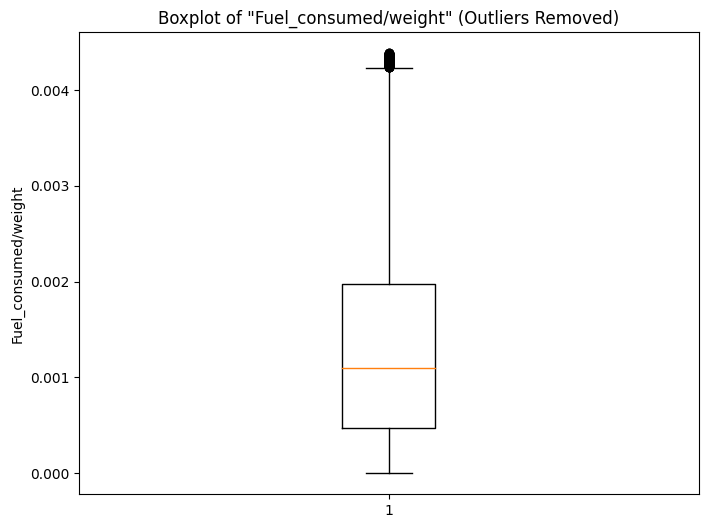

In [ ]:
# remove outliners - fuel consumed/100km
# Step 2: Determine outliers based on IQR
Q1 = df["Fuel_consumed/weight"].quantile(0.25)
Q3 = df["Fuel_consumed/weight"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter data to remove outliers
df = df[(df["Fuel_consumed/weight"] >= lower_bound) & (df["Fuel_consumed/weight"] <= upper_bound)]

# Step 4: Plot boxplot again to confirm outliers have been removed
plt.figure(figsize=(8, 6))
plt.boxplot(df["Fuel_consumed/weight"])
plt.title('Boxplot of "Fuel_consumed/weight" (Outliers Removed)')
plt.ylabel("Fuel_consumed/weight")
plt.show()

In [ ]:
df = df.drop(columns=["Fuel_consumed/weight"])

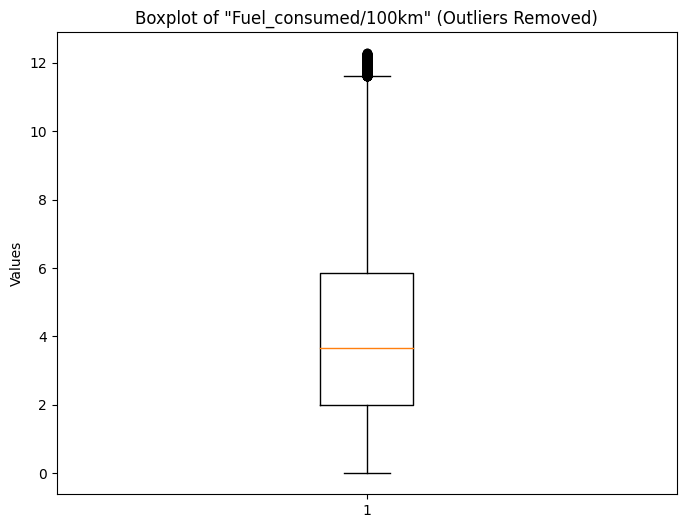

In [ ]:
# remove outliners - fuel consumed/100km
# Step 2: Determine outliers based on IQR
Q1 = df["Fuel_consumed/100km"].quantile(0.25)
Q3 = df["Fuel_consumed/100km"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter data to remove outliers
df = df[(df["Fuel_consumed/100km"] >= lower_bound) & (df["Fuel_consumed/100km"] <= upper_bound)]

# Step 4: Plot boxplot again to confirm outliers have been removed
plt.figure(figsize=(8, 6))
plt.boxplot(df["Fuel_consumed/100km"])
plt.title('Boxplot of "Fuel_consumed/100km" (Outliers Removed)')
plt.ylabel('Values')
plt.show()


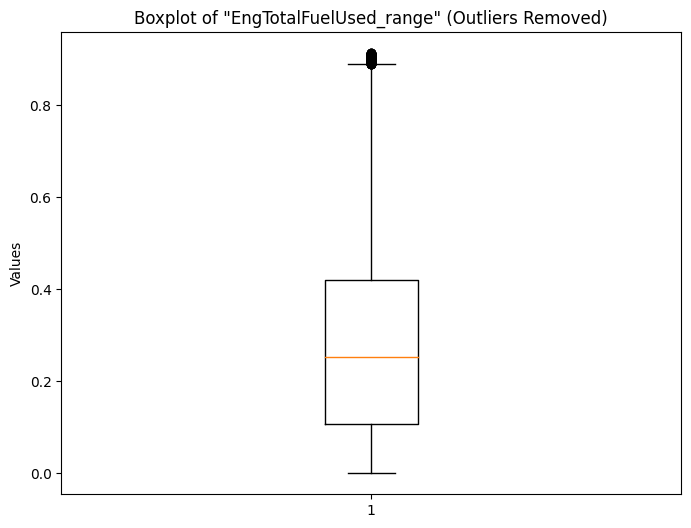

In [ ]:
# remove outliners - fuel consumed/100km
# Step 2: Determine outliers based on IQR
Q1 = df["EngTotalFuelUsed_range"].quantile(0.25)
Q3 = df["EngTotalFuelUsed_range"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter data to remove outliers
df = df[(df["EngTotalFuelUsed_range"] >= lower_bound) & (df["EngTotalFuelUsed_range"] <= upper_bound)]

# Step 4: Plot boxplot again to confirm outliers have been removed
plt.figure(figsize=(8, 6))
plt.boxplot(df["EngTotalFuelUsed_range"])
plt.title('Boxplot of "EngTotalFuelUsed_range" (Outliers Removed)')
plt.ylabel('Values')
plt.show()

In [ ]:
df.head()

slope_positive  slope_negative  slope_negative_mean  slope_negative_median  \
0             0.0             1.0             0.353333                    0.0   
1             1.0             0.0             0.400000                    0.0   
2             1.0             0.0             0.600000                    1.0   
3             0.0             1.0             0.710000                    1.0   
4             1.0             0.0             0.893333                    1.0   

   slope_negative_max  slope_negative_min  slope_negative_std  \
0                 1.0                 0.0            0.956010   
1                 1.0                 0.0            0.979796   
2                 1.0                 0.0            0.979796   
3                 1.0                 0.0            0.907524   
4                 1.0                 0.0            0.617378   

   slope_negative_range  HghRslutionTotalVehicleDistance_range  \
0                   1.0                               0.297266   
1                   1.0                               0.260494   
2                   1.0                               0.238090   
3                   1.0                               0.224380   
4                   1.0                               0.186344   

   TachographVehicleSpeed_mean  ...  EngCoolantTemp_std  EngCoolantTemp_range  \
0                     0.851718  ...            0.108880              0.141414   
1                     0.836002  ...            0.111571              0.141414   
2                     0.846375  ...            0.119342              0.141414   
3                     0.856766  ...            0.082675              0.121212   
4                     0.865980  ...            0.072887              0.080808   

   GrossCombinationVehicleWeight_mean  GrossCombinationVehicleWeight_median  \
0                            0.527771                              0.527427   
1                            0.528451                              0.527691   
2                            0.529078                              0.527691   
3                            0.529195                              0.527691   
4                            0.529195                              0.527691   

   GrossCombinationVehicleWeight_max  GrossCombinationVehicleWeight_min  \
0                           0.527691                           0.528863   
1                           0.527691                           0.528863   
2                           0.527691                           0.530279   
3                           0.527691                           0.532284   
4                           0.527691                           0.532284   

   GrossCombinationVehicleWeight_std  GrossCombinationVehicleWeight_range  \
0                       2.566370e-02                             0.024479   
1                       2.078285e-02                             0.024479   
2                       6.217396e-03                             0.014350   
3                       1.827409e-15                             0.000000   
4                       1.827409e-15                             0.000000   

   EngTotalFuelUsed_range  Fuel_consumed/100km  
0                0.547422             7.238098  
1                0.508321             7.669876  
2                0.326296             5.386645  
3                0.192250             3.367676  
4                0.058973             1.243901  

[5 rows x 71 columns]

In [ ]:
column_name = 'Fuel_consumed/100km'

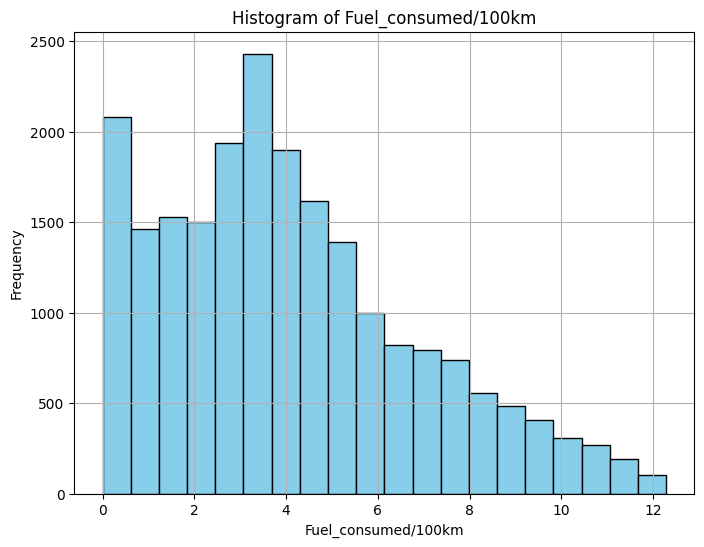

In [ ]:
# Plotting histogram
plt.figure(figsize=(8, 6))
plt.hist(df[column_name], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of {}'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

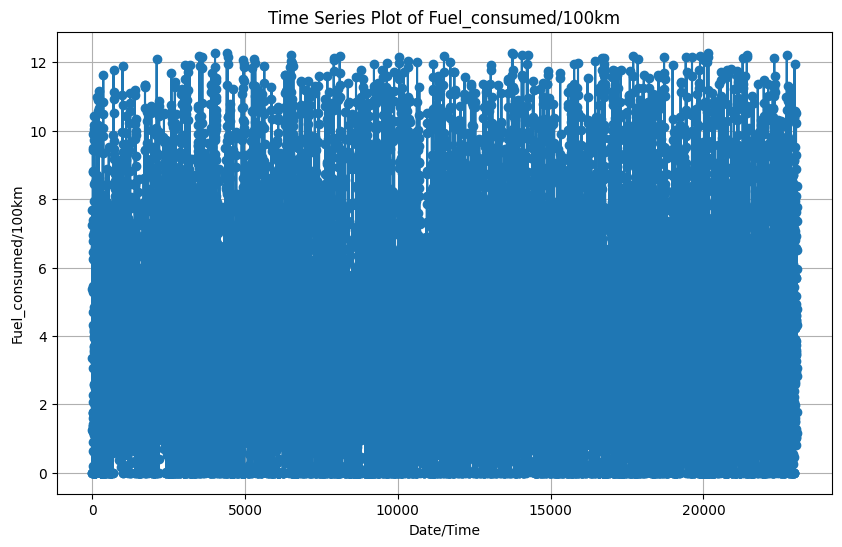

In [ ]:
# Plotting time series plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df[column_name], marker='o', linestyle='-')
plt.title('Time Series Plot of {}'.format(column_name))
plt.xlabel('Date/Time')
plt.ylabel(column_name)
plt.grid(True)
plt.show()

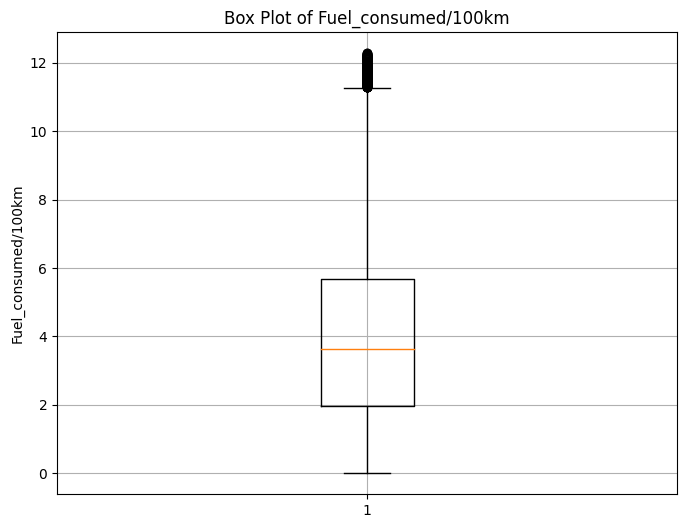

In [ ]:
# Plotting box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df[column_name])
plt.title('Box Plot of {}'.format(column_name))
plt.ylabel(column_name)
plt.grid(True)
plt.show()

In [ ]:
column_name = 'EngTotalFuelUsed_range'

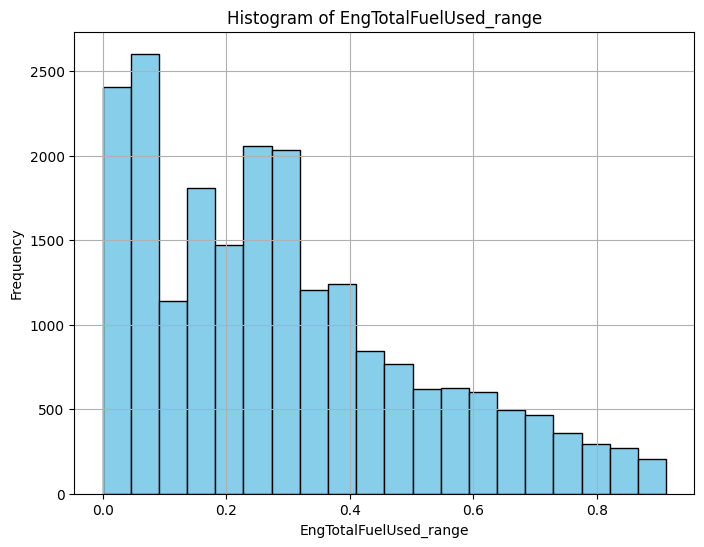

In [ ]:
# Plotting histogram
plt.figure(figsize=(8, 6))
plt.hist(df[column_name], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of {}'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

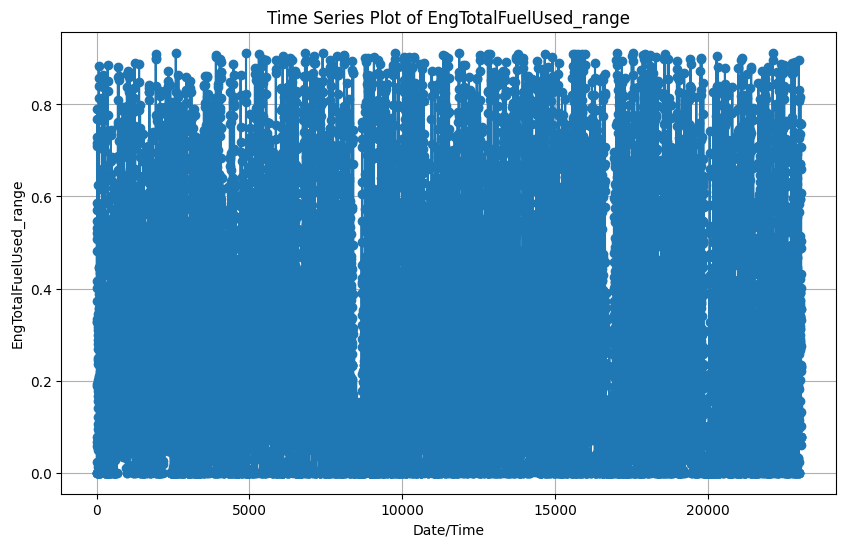

In [ ]:
# Plotting time series plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df[column_name], marker='o', linestyle='-')
plt.title('Time Series Plot of {}'.format(column_name))
plt.xlabel('Date/Time')
plt.ylabel(column_name)
plt.grid(True)
plt.show()

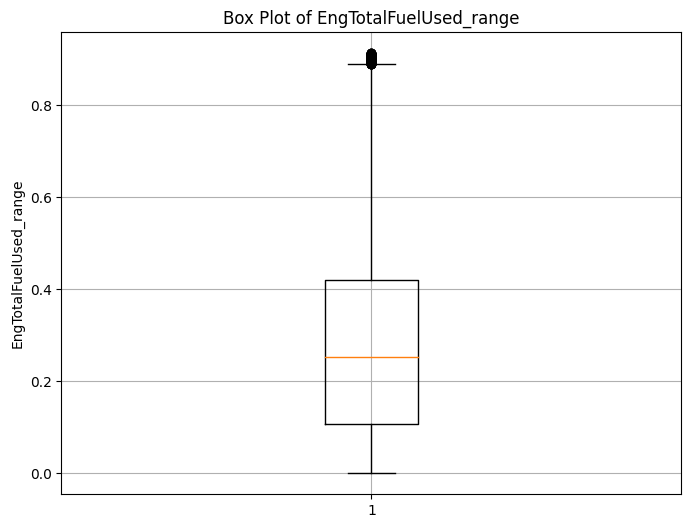

In [ ]:
# Plotting box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df[column_name])
plt.title('Box Plot of {}'.format(column_name))
plt.ylabel(column_name)
plt.grid(True)
plt.show()

In [ ]:
df.columns

Index(['slope_positive', 'slope_negative', 'slope_negative_mean',
       'slope_negative_median', 'slope_negative_max', 'slope_negative_min',
       'slope_negative_std', 'slope_negative_range',
       'HghRslutionTotalVehicleDistance_range', 'TachographVehicleSpeed_mean',
       'TachographVehicleSpeed_median', 'TachographVehicleSpeed_max',
       'TachographVehicleSpeed_min', 'TachographVehicleSpeed_std',
       'TachographVehicleSpeed_range', 'EngSpeed_mean', 'EngSpeed_median',
       'EngSpeed_max', 'EngSpeed_min', 'EngSpeed_std', 'EngSpeed_range',
       'ActualEngPercentTorque_mean', 'ActualEngPercentTorque_median',
       'ActualEngPercentTorque_max', 'ActualEngPercentTorque_min',
       'ActualEngPercentTorque_std', 'ActualEngPercentTorque_range',
       'AccelPedalPos1_mean', 'AccelPedalPos1_median', 'AccelPedalPos1_max',
       'AccelPedalPos1_min', 'AccelPedalPos1_std', 'AccelPedalPos1_range',
       'BrakePedalPos_mean', 'BrakePedalPos_median', 'BrakePedalPos_max',
       '

<ipython-input-79-42c3f3e37c9f>:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-79-42c3f3e37c9f>:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




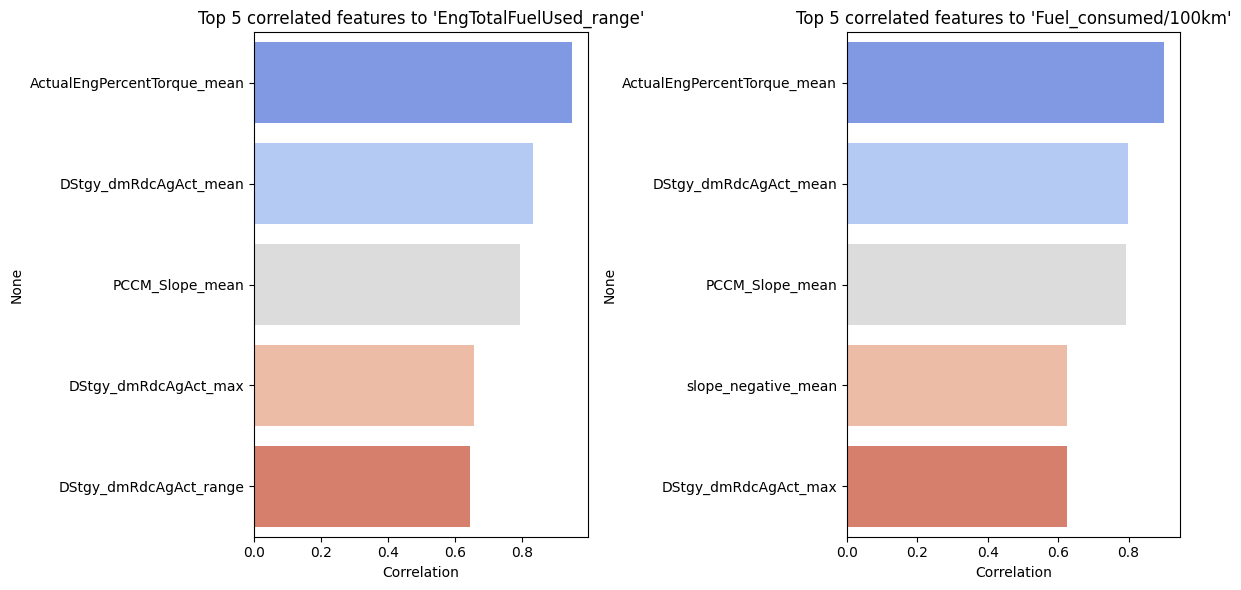

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with all the features including Target A and Target B

# Exclude features that end with "_median" and the specified columns
filtered_df_1 = df[[col for col in df.columns if not (col.endswith('_median') or col == 'Fuel_consumed/100km')]]

filtered_df_2 = df[[col for col in df.columns if not (col.endswith('_median') or col == 'EngTotalFuelUsed_range')]]

# Calculate correlation matrix
correlation_matrix_1 = filtered_df_1.corr()

correlation_matrix_2 = filtered_df_2.corr()

# Get the top correlated features to Target A (EngTotalFuelUsed_range), excluding 'Fuel_consumed/100km'
top_correlated_A = correlation_matrix_1['EngTotalFuelUsed_range'].abs().sort_values(ascending=False)[1:6]

# Get the top correlated features to Target B (Fuel_consumed/100km), excluding 'EngTotalFuelUsed_range'
top_correlated_B = correlation_matrix_2['Fuel_consumed/100km'].abs().sort_values(ascending=False)[1:6]



# Plotting top 5 most correlated features
plt.figure(figsize=(12, 6))

# Plot top 5 correlated features to 'EngTotalFuelUsed_range', excluding 'Fuel_consumed/100km'
plt.subplot(1, 2, 1)
sns.barplot(x=top_correlated_A.values, y=top_correlated_A.index, palette='coolwarm')
plt.title("Top 5 correlated features to 'EngTotalFuelUsed_range'")
plt.xlabel("Correlation")

# Plot top 5 correlated features to 'Fuel_consumed/100km', excluding 'EngTotalFuelUsed_range'
plt.subplot(1, 2, 2)
sns.barplot(x=top_correlated_B.values, y=top_correlated_B.index, palette='coolwarm')
plt.title("Top 5 correlated features to 'Fuel_consumed/100km'")
plt.xlabel("Correlation")

plt.tight_layout()
plt.show()



# **Feature subset selection**



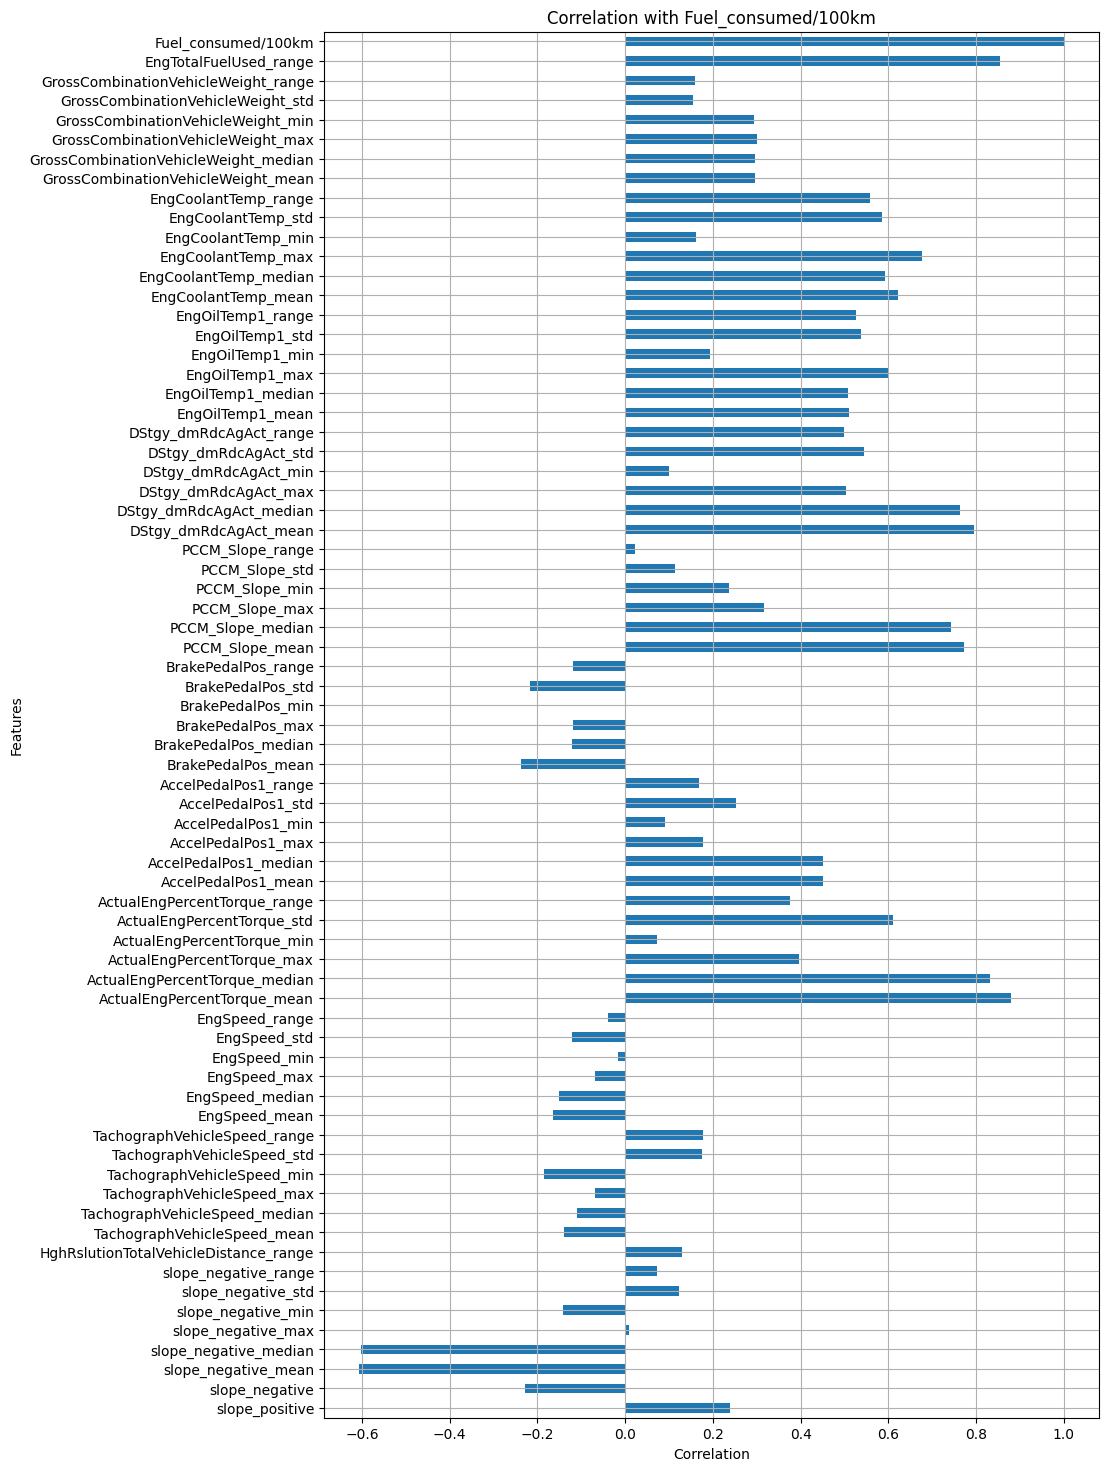

In [ ]:
def calculate_correlation(final, target_column):
    # Calculate the correlation matrix
    correlation_matrix = df.corr()

    # Extract correlation values of all features with the target column
    correlations_with_target = correlation_matrix[target_column]

    # Plot the correlations
    plt.figure(figsize=(10, 18))
    correlations_with_target.plot(kind='barh')
    plt.xlabel('Correlation')
    plt.ylabel('Features')
    plt.title('Correlation with {}'.format(target_column))
    plt.grid(True)
    plt.show()

# Target column name
target_column = 'Fuel_consumed/100km'

# Calculate and plot correlations
calculate_correlation(df, target_column)

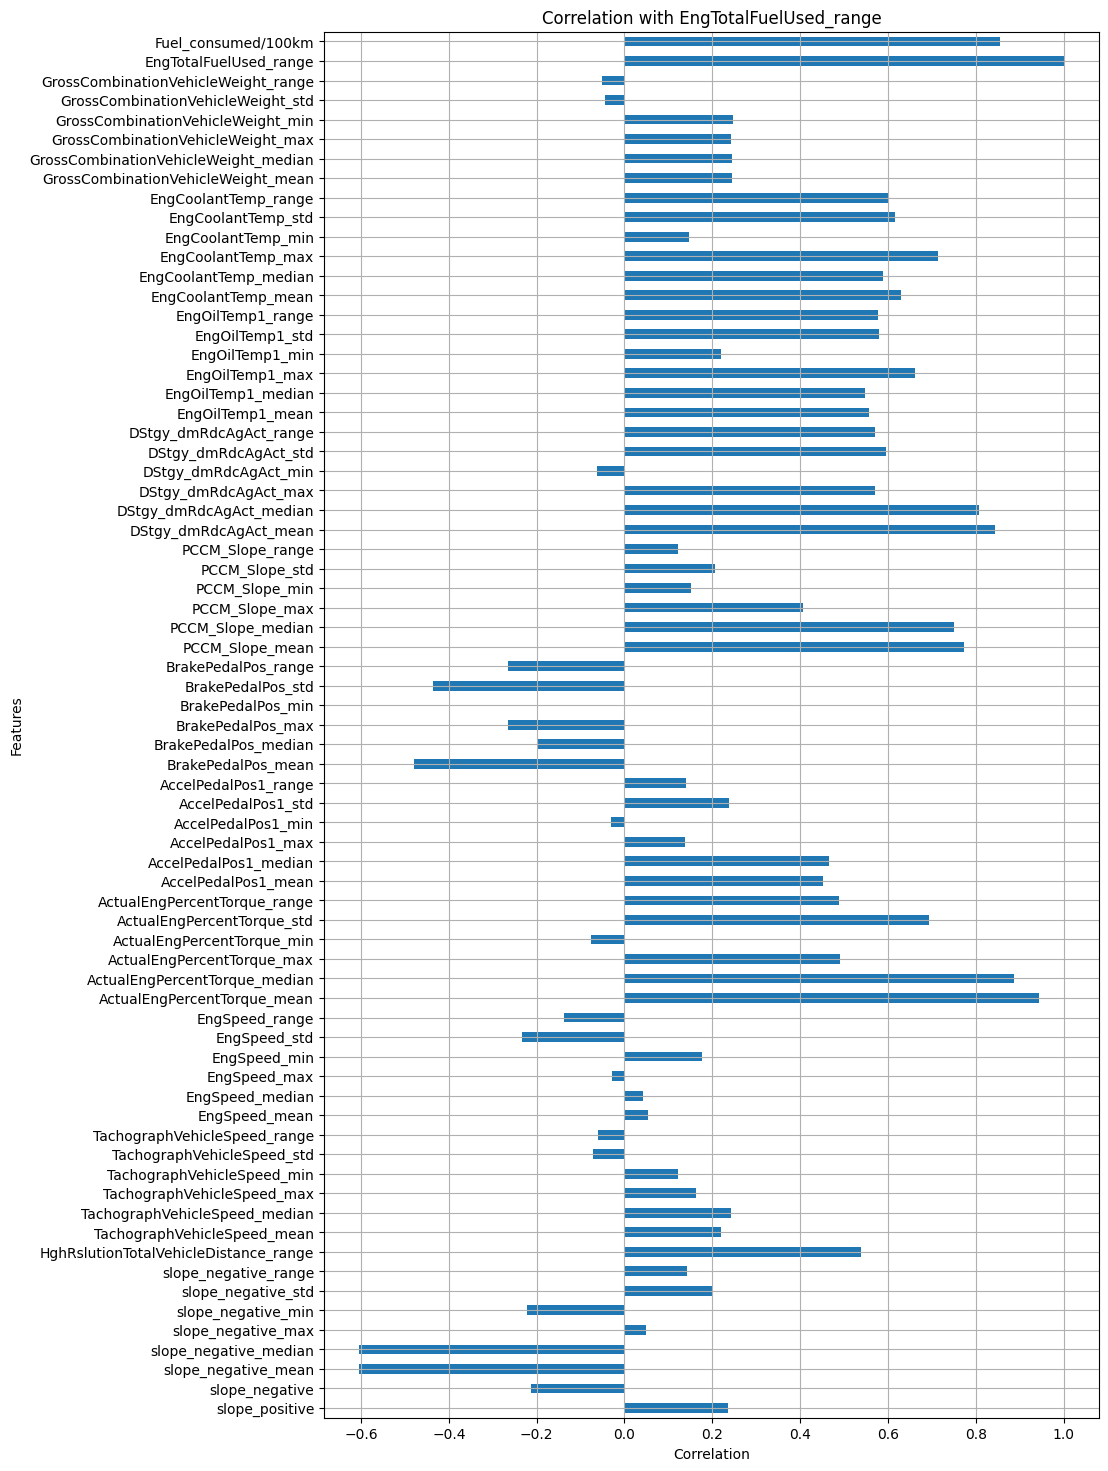

In [ ]:
def calculate_correlation(final, target_column):
    # Calculate the correlation matrix
    correlation_matrix = df.corr()

    # Extract correlation values of all features with the target column
    correlations_with_target = correlation_matrix[target_column]

    # Plot the correlations
    plt.figure(figsize=(10, 18))
    correlations_with_target.plot(kind='barh')
    plt.xlabel('Correlation')
    plt.ylabel('Features')
    plt.title('Correlation with {}'.format(target_column))
    plt.grid(True)
    plt.show()

# Target column name
target_column = 'EngTotalFuelUsed_range'

# Calculate and plot correlations
calculate_correlation(df, target_column)

In [ ]:

correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['Fuel_consumed/100km']

# Select the absolute values of the correlation coefficients
abs_correlation_with_target = correlation_with_target.abs()

# Sort the absolute values of the correlation coefficients in descending order
sorted_correlation = abs_correlation_with_target.sort_values(ascending=False)

# Choose the top 10 features with the highest absolute correlation coefficients
top_30_features = sorted_correlation.index[1:31]  # Excluding the target variable itself

print("Top 30 features correlated with the 'Fuel_consumed/100km':")
print(top_30_features)

Top 30 features correlated with the 'Fuel_consumed/100km':
Index(['ActualEngPercentTorque_mean', 'EngTotalFuelUsed_range',
       'ActualEngPercentTorque_median', 'DStgy_dmRdcAgAct_mean',
       'PCCM_Slope_mean', 'DStgy_dmRdcAgAct_median', 'PCCM_Slope_median',
       'EngCoolantTemp_max', 'EngCoolantTemp_mean',
       'ActualEngPercentTorque_std', 'slope_negative_mean',
       'slope_negative_median', 'EngOilTemp1_max', 'EngCoolantTemp_median',
       'EngCoolantTemp_std', 'EngCoolantTemp_range', 'DStgy_dmRdcAgAct_std',
       'EngOilTemp1_std', 'EngOilTemp1_range', 'EngOilTemp1_mean',
       'EngOilTemp1_median', 'DStgy_dmRdcAgAct_max', 'DStgy_dmRdcAgAct_range',
       'AccelPedalPos1_mean', 'AccelPedalPos1_median',
       'ActualEngPercentTorque_max', 'ActualEngPercentTorque_range',
       'PCCM_Slope_max', 'GrossCombinationVehicleWeight_max',
       'GrossCombinationVehicleWeight_mean'],
      dtype='object')


In [ ]:
# Save the df
df.to_csv('Final_Un.csv', index=False)  # Set index=False if you don't want to save the index


# **Modelling**

In [ ]:
#import df
df = pd.read_csv("/content/Final_10_2.csv")

df_1 = pd.read_csv("/content/Final_Un.csv")

# **Model 1**
10 minute

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import pandas as pd

In [ ]:
# split the df into test and train

# edited to consider only the means
columns_to_drop = ['EngTotalFuelUsed_range', 'Fuel_consumed/100km']

# Filter out columns ending with "_median"
columns_to_drop += [col for col in df.columns if col.endswith('_median')]

# Drop selected columns from DataFrame
X = df.drop(columns=columns_to_drop)
y = df['EngTotalFuelUsed_range']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 , shuffle =  False)


In [ ]:
# Create XGBoost regressor
xgb_model = xgb.XGBRegressor()

# Define parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_xgb_model = xgb.XGBRegressor(**best_params)
best_xgb_model.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Make predictions
y_pred_train = best_xgb_model.predict(X_train)
y_pred_test = best_xgb_model.predict(X_test)

In [ ]:
# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE on train set:", rmse_train)
print("RMSE on test set:", rmse_test)

# Calculate R-squared
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("R-squared on train set:", r2_train)
print("R-squared on test set:", r2_test)

RMSE on train set: 0.024263628076677264
RMSE on test set: 0.050896072670493446
R-squared on train set: 0.9963829846147544
R-squared on test set: 0.9848707356804878


In [ ]:
# Create traces for train set
trace_train_actual = go.Scatter(x=y_train, y=y_pred_train, mode='markers', name='Actual vs Predicted (Train)', marker=dict(color='blue'))
trace_train_ideal = go.Scatter(x=y_train, y=y_train, mode='lines', name='Ideal Fit (Train)', line=dict(color='black', dash='dash'))

# Create traces for test set
trace_test_actual = go.Scatter(x=y_test, y=y_pred_test, mode='markers', name='Actual vs Predicted (Test)', marker=dict(color='red'))
trace_test_ideal = go.Scatter(x=y_test, y=y_test, mode='lines', name='Ideal Fit (Test)', line=dict(color='black', dash='dash'))

# Create subplot
fig = make_subplots(rows=1, cols=2, subplot_titles=('Train Set', 'Test Set'))

# Add traces to subplot
fig.add_trace(trace_train_actual, row=1, col=1)
fig.add_trace(trace_train_ideal, row=1, col=1)
fig.add_trace(trace_test_actual, row=1, col=2)
fig.add_trace(trace_test_ideal, row=1, col=2)

# Update layout
fig.update_layout(title='Model vs Actual', xaxis_title='Actual', yaxis_title='Predicted', showlegend=True)

# Show plot
fig.show()


In [ ]:
# Function to calculate moving averages
def moving_average(data, window_size):
    return pd.Series(data).rolling(window=window_size, min_periods=1).mean()

# Calculate moving averages for train and test sets
train_ma_actual = moving_average(y_train, window_size=50)
train_ma_pred = moving_average(y_pred_train, window_size=50)
test_ma_actual = moving_average(y_test, window_size=50)
test_ma_pred = moving_average(y_pred_test, window_size=50)

# Create a sequence of indices for train and test sets
train_indices = list(range(len(train_ma_actual)))
test_indices = list(range(len(test_ma_actual)))

# Create trace for train set
trace_train_actual = go.Scatter(x=train_indices, y=train_ma_actual, mode='lines', name='Actual (Train)', line=dict(color='blue'))
trace_train_pred = go.Scatter(x=train_indices, y=train_ma_pred, mode='lines', name='Predicted (Train)', line=dict(color='red'))

# Create trace for test set
trace_test_actual = go.Scatter(x=test_indices, y=test_ma_actual, mode='lines', name='Actual (Test)', line=dict(color='blue'))
trace_test_pred = go.Scatter(x=test_indices, y=test_ma_pred, mode='lines', name='Predicted (Test)', line=dict(color='red'))

# Create subplot for train set
fig_train = go.Figure()
fig_train.add_trace(trace_train_actual)
fig_train.add_trace(trace_train_pred)
fig_train.update_layout(title='Smoothed Model fuel consumption Over Time (Train Set)',
                        xaxis_title='Data Point',
                        yaxis_title='fuel consumption')

# Create subplot for test set
fig_test = go.Figure()
fig_test.add_trace(trace_test_actual)
fig_test.add_trace(trace_test_pred)
fig_test.update_layout(title='Smoothed Model fuel consumption Over Time (Test Set)',
                       xaxis_title='Data Point',
                       yaxis_title='fuel consumption')

# Show the plots
fig_train.show()
fig_test.show()


### **Model 2**

5 minutes

In [ ]:
# split the df into test and train

# edited to consider only the means
columns_to_drop = ['EngTotalFuelUsed_range', 'Fuel_consumed/100km']

# Filter out columns ending with "_median"
columns_to_drop += [col for col in df.columns if col.endswith('_median')]

# Drop selected columns from DataFrame
X = df_1.drop(columns=columns_to_drop)
y = df_1['EngTotalFuelUsed_range']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 , shuffle =  False)


In [ ]:
X.columns

Index(['slope_positive', 'slope_negative', 'slope_negative_mean',
       'slope_negative_max', 'slope_negative_min', 'slope_negative_std',
       'slope_negative_range', 'HghRslutionTotalVehicleDistance_range',
       'TachographVehicleSpeed_mean', 'TachographVehicleSpeed_max',
       'TachographVehicleSpeed_min', 'TachographVehicleSpeed_std',
       'TachographVehicleSpeed_range', 'EngSpeed_mean', 'EngSpeed_max',
       'EngSpeed_min', 'EngSpeed_std', 'EngSpeed_range',
       'ActualEngPercentTorque_mean', 'ActualEngPercentTorque_max',
       'ActualEngPercentTorque_min', 'ActualEngPercentTorque_std',
       'ActualEngPercentTorque_range', 'AccelPedalPos1_mean',
       'AccelPedalPos1_max', 'AccelPedalPos1_min', 'AccelPedalPos1_std',
       'AccelPedalPos1_range', 'BrakePedalPos_mean', 'BrakePedalPos_max',
       'BrakePedalPos_min', 'BrakePedalPos_std', 'BrakePedalPos_range',
       'PCCM_Slope_mean', 'PCCM_Slope_max', 'PCCM_Slope_min', 'PCCM_Slope_std',
       'PCCM_Slope_range', 'D

In [ ]:
y.head()

0    0.547422
1    0.508321
2    0.326296
3    0.192250
4    0.058973
Name: EngTotalFuelUsed_range, dtype: float64

In [ ]:


# Create XGBoost regressor
xgb_model = xgb.XGBRegressor()
# Define parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_xgb_model_2 = xgb.XGBRegressor(**best_params)
best_xgb_model_2.fit(X_train, y_train)





Fitting 5 folds for each of 27 candidates, totalling 135 fits


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Make predictions
y_pred_train_2 = best_xgb_model_2.predict(X_train)
y_pred_test_2 = best_xgb_model_2.predict(X_test)

In [ ]:
# Calculate RMSE
rmse_train_2 = np.sqrt(mean_squared_error(y_train, y_pred_train_2))
rmse_test_2 = np.sqrt(mean_squared_error(y_test, y_pred_test_2))
print("RMSE on train set:", rmse_train_2)
print("RMSE on test set:", rmse_test_2)

# Calculate R-squared
r2_train_2 = r2_score(y_train, y_pred_train_2)
r2_test_2 = r2_score(y_test, y_pred_test_2)


print("Adjusted R-squared on train set:", r2_train_2)
print("Adjusted R-squared on test set:", r2_test_2)

RMSE on train set: 0.028269566482241194
RMSE on test set: 0.03646406175355889
Adjusted R-squared on train set: 0.9837169989227765
Adjusted R-squared on test set: 0.9731401130735804


In [ ]:
# Visualizations
# Create traces for train set
trace_train_actual = go.Scatter(x=y_train, y=y_pred_train_2, mode='markers', name='Actual vs Predicted (Train)', marker=dict(color='blue'))
trace_train_ideal = go.Scatter(x=y_train, y=y_train, mode='lines', name='Ideal Fit (Train)', line=dict(color='black', dash='dash'))

# Create traces for test set
trace_test_actual = go.Scatter(x=y_test, y=y_pred_test_2, mode='markers', name='Actual vs Predicted (Test)', marker=dict(color='red'))
trace_test_ideal = go.Scatter(x=y_test, y=y_test, mode='lines', name='Ideal Fit (Test)', line=dict(color='black', dash='dash'))

# Create subplot
fig = make_subplots(rows=1, cols=2, subplot_titles=('Train Set', 'Test Set'))

# Add traces to subplot
fig.add_trace(trace_train_actual, row=1, col=1)
fig.add_trace(trace_train_ideal, row=1, col=1)
fig.add_trace(trace_test_actual, row=1, col=2)
fig.add_trace(trace_test_ideal, row=1, col=2)

# Update layout
fig.update_layout(title='Model vs Actual', xaxis_title='Actual', yaxis_title='Predicted', showlegend=True)

# Show plot
fig.show()

In [ ]:
#function used in the model 1 for the moving averages and visualization
# Function to calculate moving averages
def moving_average(data, window_size):
    return pd.Series(data).rolling(window=window_size, min_periods=1).mean()
# Calculate moving averages for Model 2 train and test sets
train_ma_actual_2 = moving_average(y_train, window_size=50)
train_ma_pred_2 = moving_average(y_pred_train_2, window_size=50)
test_ma_actual_2 = moving_average(y_test, window_size=50)
test_ma_pred_2 = moving_average(y_pred_test_2, window_size=50)

# Create a sequence of indices for train and test sets
train_indices_2 = list(range(len(train_ma_actual_2)))
test_indices_2 = list(range(len(test_ma_actual_2)))

# Create trace for train set for Model 2
trace_train_actual_2 = go.Scatter(x=train_indices_2, y=train_ma_actual_2, mode='lines', name='Actual (Train)', line=dict(color='blue'))
trace_train_pred_2 = go.Scatter(x=train_indices_2, y=train_ma_pred_2, mode='lines', name='Predicted (Train)', line=dict(color='red'))

# Create trace for test set for Model 2
trace_test_actual_2 = go.Scatter(x=test_indices_2, y=test_ma_actual_2, mode='lines', name='Actual (Test)', line=dict(color='blue'))
trace_test_pred_2 = go.Scatter(x=test_indices_2, y=test_ma_pred_2, mode='lines', name='Predicted (Test)', line=dict(color='red'))

# Create subplot for train set for Model 2
fig_train_2 = go.Figure()
fig_train_2.add_trace(trace_train_actual_2)
fig_train_2.add_trace(trace_train_pred_2)
fig_train_2.update_layout(title='Smoothed Model 2 fuel consumption Over Time (Train Set)',
                          xaxis_title='Data Point',
                          yaxis_title='fuel consumption')

# Create subplot for test set for Model 2
fig_test_2 = go.Figure()
fig_test_2.add_trace(trace_test_actual_2)
fig_test_2.add_trace(trace_test_pred_2)
fig_test_2.update_layout(title='Smoothed Model 2 fuel consumption Over Time (Test Set)',
                         xaxis_title='Data Point',
                         yaxis_title='fuel consumption')

# Show the plots for Model 2
fig_train_2.show()
fig_test_2.show()

# **Final segment**

In [1]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import  RepeatedKFold
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, mean_squared_error

In [2]:
df = pd.read_csv("/content/Final_10_2.csv")

In [3]:
df.columns

Index(['slope_positive', 'slope_negative', 'slope_negative_mean',
       'slope_negative_median', 'slope_negative_max', 'slope_negative_min',
       'slope_negative_std', 'slope_negative_range',
       'HghRslutionTotalVehicleDistance_range', 'TachographVehicleSpeed_mean',
       'TachographVehicleSpeed_median', 'TachographVehicleSpeed_max',
       'TachographVehicleSpeed_min', 'TachographVehicleSpeed_std',
       'TachographVehicleSpeed_range', 'EngSpeed_mean', 'EngSpeed_median',
       'EngSpeed_max', 'EngSpeed_min', 'EngSpeed_std', 'EngSpeed_range',
       'ActualEngPercentTorque_mean', 'ActualEngPercentTorque_median',
       'ActualEngPercentTorque_max', 'ActualEngPercentTorque_min',
       'ActualEngPercentTorque_std', 'ActualEngPercentTorque_range',
       'AccelPedalPos1_mean', 'AccelPedalPos1_median', 'AccelPedalPos1_max',
       'AccelPedalPos1_min', 'AccelPedalPos1_std', 'AccelPedalPos1_range',
       'BrakePedalPos_mean', 'BrakePedalPos_median', 'BrakePedalPos_max',
       '

# **Model 1**

Final Model XGBOOST

Using All features (Means and not median)

In [9]:
!pip install xgboost scikit-learn



In [6]:
pip install graphviz

In [5]:
pip install graphviz

In [10]:
mean_features_columns =['slope_positive', 'slope_negative', 'slope_negative_mean', 'slope_negative_max', 'slope_negative_min',
       'slope_negative_std', 'slope_negative_range',
       'HghRslutionTotalVehicleDistance_range', 'TachographVehicleSpeed_mean', 'TachographVehicleSpeed_max',
       'TachographVehicleSpeed_min', 'TachographVehicleSpeed_std',
       'TachographVehicleSpeed_range', 'EngSpeed_mean',
       'EngSpeed_max', 'EngSpeed_min', 'EngSpeed_std', 'EngSpeed_range',
       'ActualEngPercentTorque_mean',
       'ActualEngPercentTorque_max', 'ActualEngPercentTorque_min',
       'ActualEngPercentTorque_std', 'ActualEngPercentTorque_range',
       'AccelPedalPos1_mean',  'AccelPedalPos1_max',
       'AccelPedalPos1_min', 'AccelPedalPos1_std', 'AccelPedalPos1_range',
       'BrakePedalPos_mean',  'BrakePedalPos_max',
       'BrakePedalPos_min', 'BrakePedalPos_std', 'BrakePedalPos_range',
       'PCCM_Slope_mean',  'PCCM_Slope_max',
       'PCCM_Slope_min', 'PCCM_Slope_std', 'PCCM_Slope_range',
       'DStgy_dmRdcAgAct_mean',
       'DStgy_dmRdcAgAct_max', 'DStgy_dmRdcAgAct_min', 'DStgy_dmRdcAgAct_std',
       'DStgy_dmRdcAgAct_range', 'EngOilTemp1_mean',
       'EngOilTemp1_max', 'EngOilTemp1_min', 'EngOilTemp1_std',
       'EngOilTemp1_range', 'EngCoolantTemp_mean',
       'EngCoolantTemp_max', 'EngCoolantTemp_min', 'EngCoolantTemp_std',
       'EngCoolantTemp_range', 'GrossCombinationVehicleWeight_mean',
       'GrossCombinationVehicleWeight_max',
       'GrossCombinationVehicleWeight_min',
       'GrossCombinationVehicleWeight_std',
       'GrossCombinationVehicleWeight_range']

In [ ]:
# Splitting without shuffling
#df_90, df_10 = train_test_split(df, test_size=0.35, shuffle=False, random_state=42)

# Displaying the lengths of the resulting DataFrames
#print("90% DataFrame length:", len(df_90))
#print("10% DataFrame length:", len(df_10))


90% DataFrame length: 9078
10% DataFrame length: 1009


In [11]:
# For modelling
X = df[mean_features_columns]

y = df["Fuel_consumed/100km"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 , shuffle =  False)

# Remove rows with NaN or infinity values in y_train
mask = np.isfinite(y_train)
X_train = X_train[mask]
y_train = y_train[mask]
print("Size of X_train:", X_train.shape)
print("Size of X_test:", X_test.shape)
print("Size of y_train:", y_train.shape)
print("Size of y_test:", y_test.shape)


Size of X_train: (8069, 58)
Size of X_test: (2018, 58)
Size of y_train: (8069,)
Size of y_test: (2018,)


In [42]:
# Modelling
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming X_train and y_train are your training data
# X_train, y_train should be defined prior to this code

# Create XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Define parameter grid for grid search
param_grid = {
    'n_estimators': [300, 500, 700],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [4, 5, 7]
}

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters
best_xgb_model = xgb.XGBRegressor(**best_params, objective='reg:squarederror')
best_xgb_model.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:  {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 700}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Fold 1: MAE = 0.3049, R2 = 0.9376, RMSE = 0.6114
Fold 2: MAE = 0.2758, R2 = 0.9668, RMSE = 0.4499
Fold 3: MAE = 0.2844, R2 = 0.9686, RMSE = 0.4439
Fold 4: MAE = 0.3278, R2 = 0.9477, RMSE = 0.6040
Fold 5: MAE = 0.2932, R2 = 0.9676, RMSE = 0.4516
Fold 6: MAE = 0.3086, R2 = 0.9606, RMSE = 0.5196
Fold 7: MAE = 0.3084, R2 = 0.9441, RMSE = 0.5880
Fold 8: MAE = 0.3092, R2 = 0.9405, RMSE = 0.6037
Fold 9: MAE = 0.3073, R2 = 0.9572, RMSE = 0.5196
Fold 10: MAE = 0.2992, R2 = 0.9475, RMSE = 0.5947


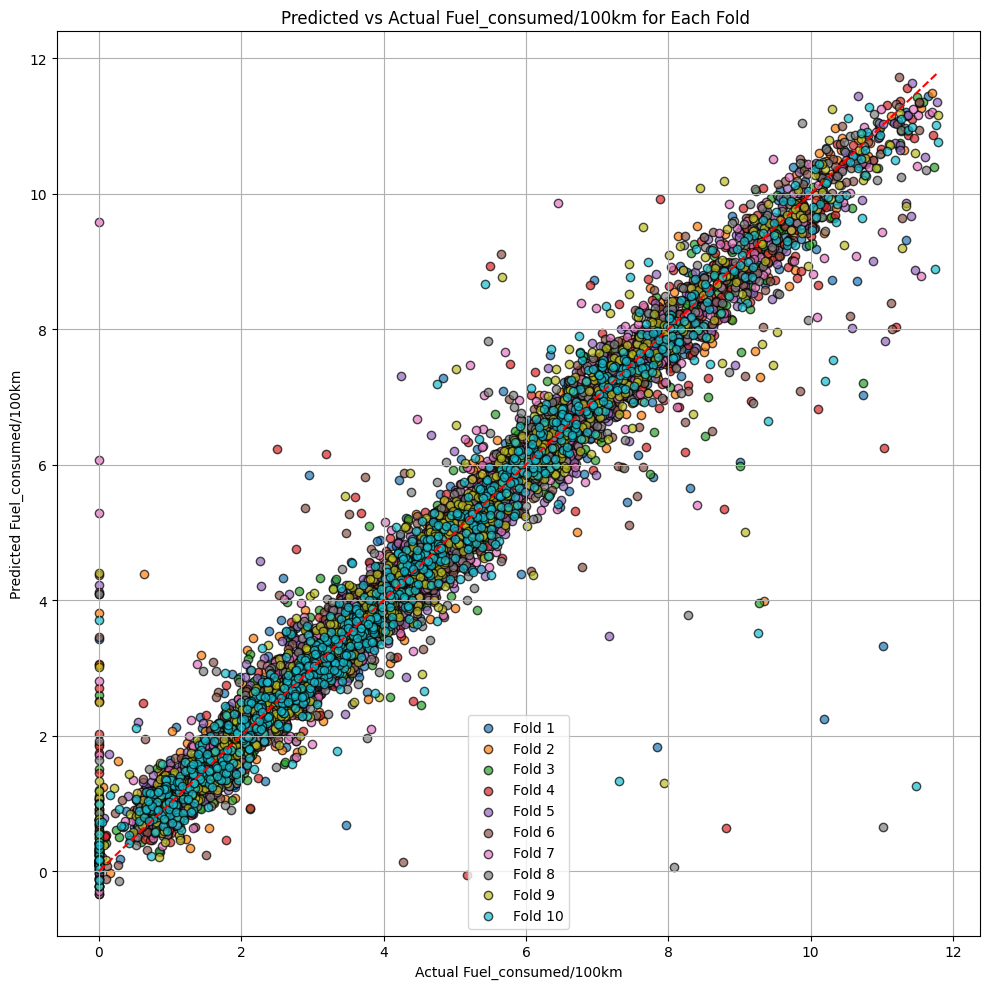

In [43]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, make_scorer

# Assuming X is a pandas DataFrame and y is a pandas Series or DataFrame
# Use your pre-existing model
model = best_xgb_model

# Define the cross-validation strategy
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store the actual and predicted values for each fold
actual_values = []
predicted_values = []

# Lists to store metrics for each fold
mae_scores = []
r2_scores = []
rmse_scores = []

# Perform cross-validation and store predictions
fold = 1
for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    actual_values.append(y_test)
    predicted_values.append(y_pred)

    # Calculate and store metrics for each fold
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    mae_scores.append(mae)
    r2_scores.append(r2)
    rmse_scores.append(rmse)

    # Print fold scores
    print(f"Fold {fold}: MAE = {mae:.4f}, R2 = {r2:.4f}, RMSE = {rmse:.4f}")
    fold += 1

# Convert lists of arrays into single arrays
actual_values = np.concatenate(actual_values)
predicted_values = np.concatenate(predicted_values)

# Plotting Predicted vs Actual
plt.figure(figsize=(10, 10))

# Assign a different color to each fold
colors = plt.cm.tab10(np.linspace(0, 1, 10))

for i in range(10):
    start_index = i * (len(actual_values) // 10)
    end_index = (i + 1) * (len(actual_values) // 10)
    plt.scatter(actual_values[start_index:end_index], predicted_values[start_index:end_index], color=colors[i], edgecolor='k', alpha=0.7, label=f'Fold {i + 1}')

plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'r--')  # Ideal line
plt.xlabel('Actual Fuel_consumed/100km')
plt.ylabel('Predicted Fuel_consumed/100km')
plt.title('Predicted vs Actual Fuel_consumed/100km for Each Fold ')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

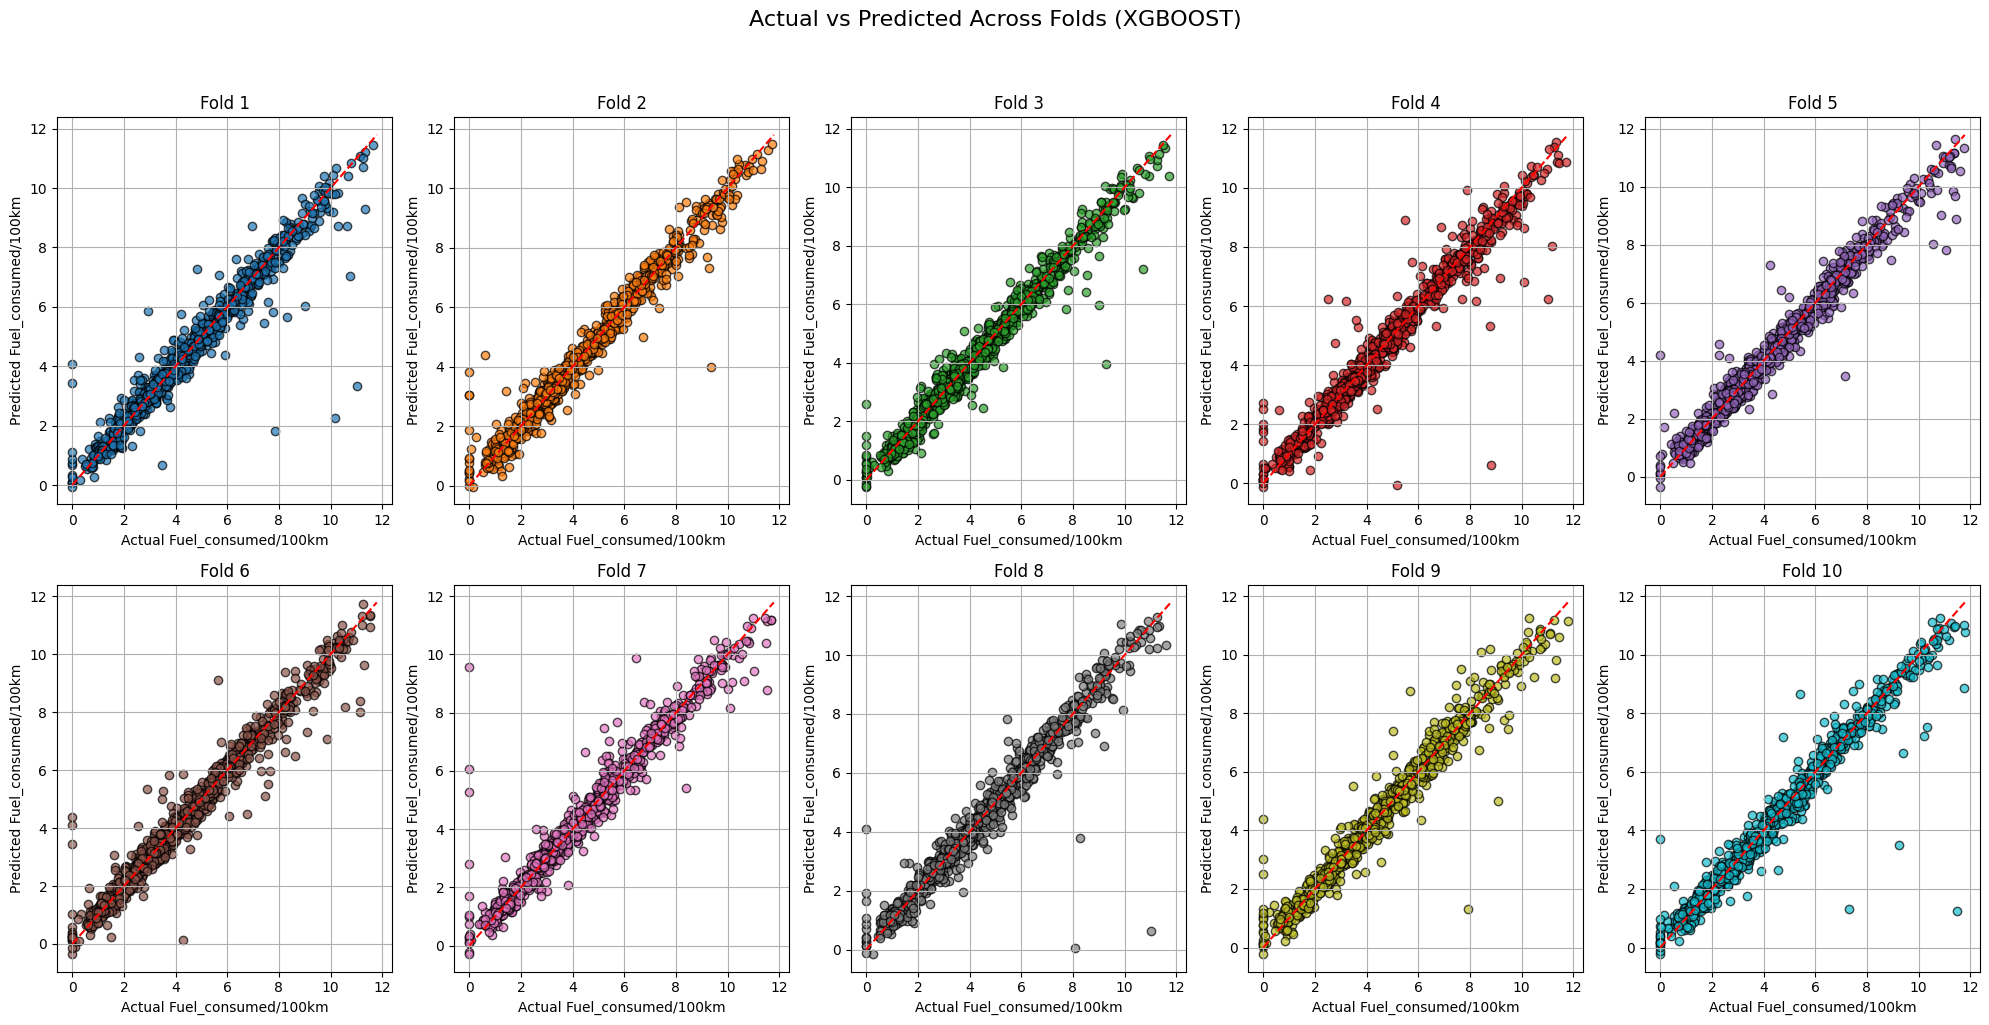

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming actual_values and predicted_values are defined and contain the data
# Example:
# actual_values = np.random.rand(100) * 100  # Replace with your actual values
# predicted_values = np.random.rand(100) * 100  # Replace with your predicted values

fig, axs = plt.subplots(2, 5, figsize=(20, 10))
axs = axs.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

colors = plt.cm.tab10(np.linspace(0, 1, 10))

for i in range(10):
    start_index = i * (len(actual_values) // 10)
    end_index = (i + 1) * (len(actual_values) // 10)
    axs[i].scatter(actual_values[start_index:end_index], predicted_values[start_index:end_index], color=colors[i], edgecolor='k', alpha=0.7)
    axs[i].plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'r--')  # Ideal line
    axs[i].set_xlabel('Actual Fuel_consumed/100km')
    axs[i].set_ylabel('Predicted Fuel_consumed/100km')
    axs[i].set_title(f'Fold {i + 1}')
    axs[i].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout to make space for the suptitle
plt.suptitle('Actual vs Predicted Across Folds (XGBOOST)', fontsize=16, y=1.02)  # Adjust y for better positioning
plt.show()




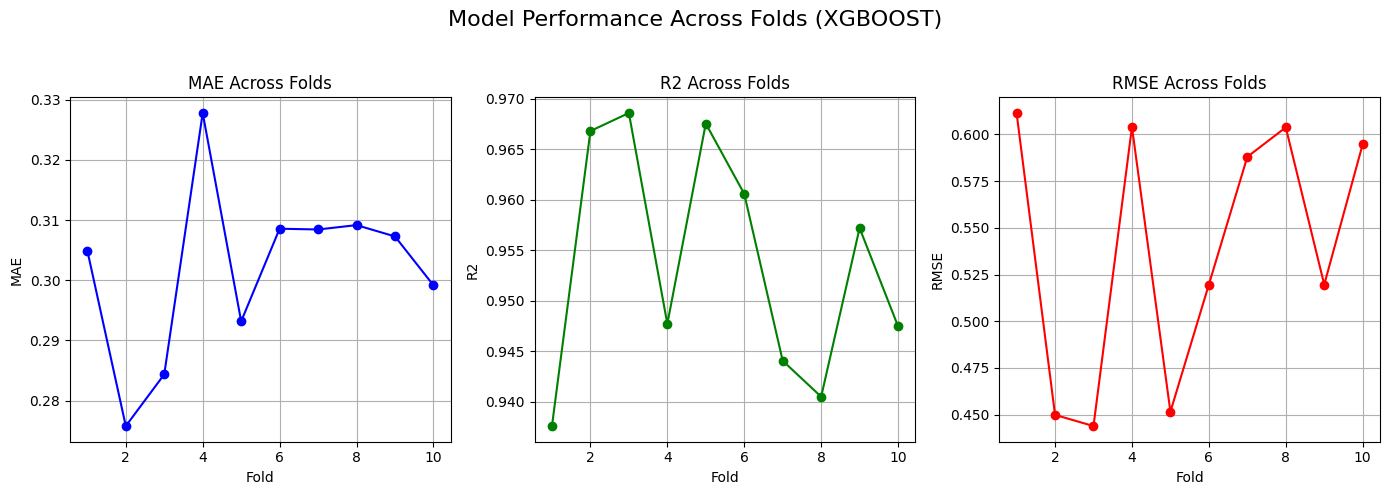

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Fold numbers
folds = np.arange(1, 11)

plt.figure(figsize=(14, 5))

# MAE
plt.subplot(1, 3, 1)
plt.plot(folds, mae_scores, marker='o', color='b')
plt.title('MAE Across Folds')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.grid(True)

# R2
plt.subplot(1, 3, 2)
plt.plot(folds, r2_scores, marker='o', color='g')
plt.title('R2 Across Folds')
plt.xlabel('Fold')
plt.ylabel('R2')
plt.grid(True)

# RMSE
plt.subplot(1, 3, 3)
plt.plot(folds, rmse_scores, marker='o', color='r')
plt.title('RMSE Across Folds')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.grid(True)

# Add a grand title
plt.suptitle('Model Performance Across Folds (XGBOOST)', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect parameter to fit the suptitle
plt.show()


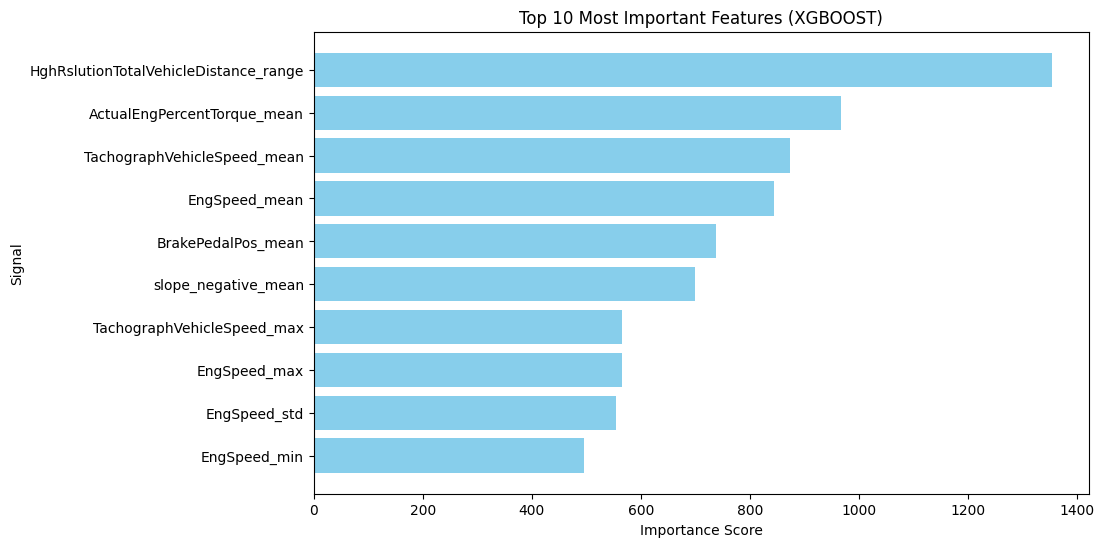

In [46]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assume best_xgb_model is your trained XGBoost model

# Extract the feature importances
importance = best_xgb_model.get_booster().get_score(importance_type='weight')

# Sort the feature importances
importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Select the top 10 features
top_10_features = importance[:10]

# Separate the features and their importance scores
features = [x[0] for x in top_10_features]
scores = [x[1] for x in top_10_features]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(features, scores, color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Signal')
plt.title('Top 10 Most Important Features (XGBOOST)')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


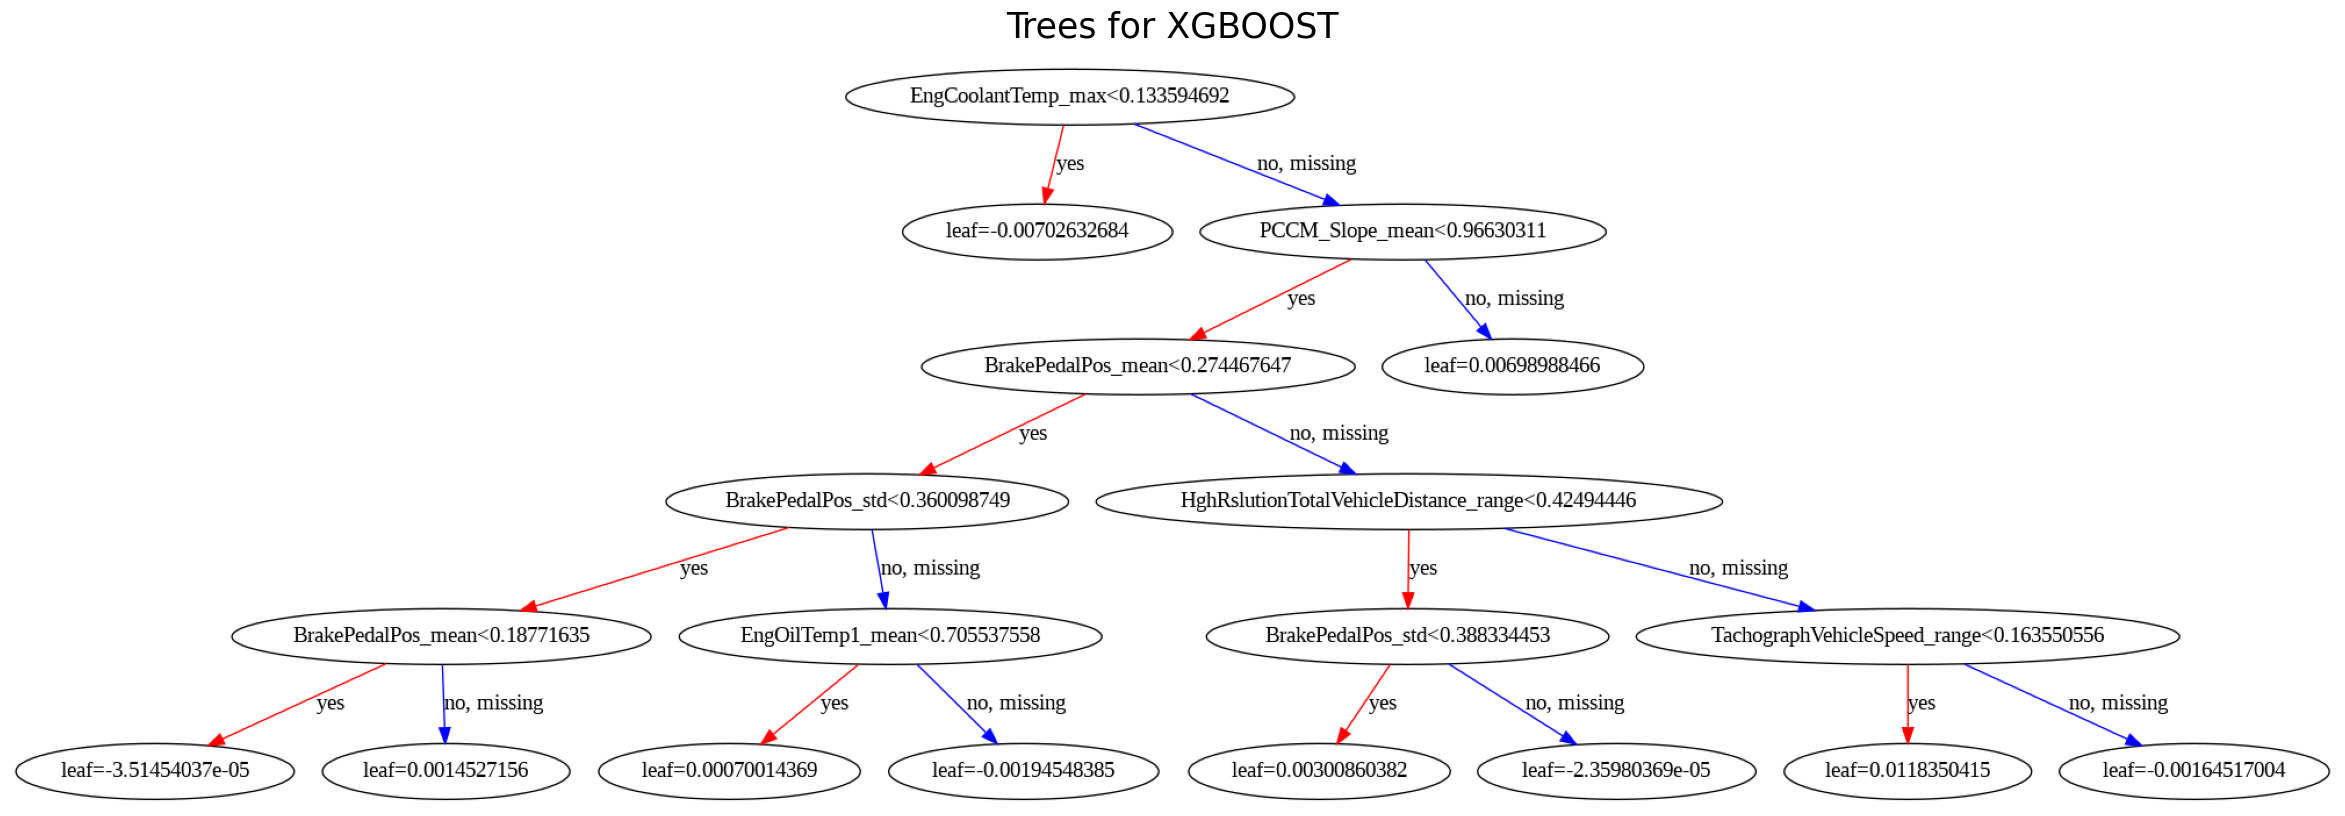

In [47]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming 'best_xgb_model' is your trained XGBoost model
# Convert the model to a Booster object if it's not already one
booster = best_xgb_model.get_booster() if isinstance(best_xgb_model, xgb.XGBModel) else best_xgb_model

# Function to count nodes in a tree
def count_nodes(tree):
    return len(tree.splitlines()) - 1  # Subtracting one for the root node line

# Get all trees as text
trees = booster.get_dump()
tree_sizes = [count_nodes(tree) for tree in trees]

# Identify the smallest tree
smallest_tree_index = tree_sizes.index(min(tree_sizes))
smallest_tree = trees[smallest_tree_index]

# Plot the smallest tree
dot_data = xgb.to_graphviz(booster, num_trees=smallest_tree_index)
dot_data.render('smallest_tree', format='png')

# Load the PNG and display with matplotlib
img = plt.imread('smallest_tree.png')
fig, ax = plt.subplots(figsize=(30, 70))  # Adjust the size as needed
ax.imshow(img)
ax.axis('off')  # Hide the axes
ax.set_title("Trees for XGBOOST", fontsize=25, pad=20)  # Add title with specified font size and padding
plt.show()




# **Final Model 2: Random Forest**

In [48]:
# For modelling
X = df[mean_features_columns]

y = df["Fuel_consumed/100km"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 , shuffle =  False)

# Remove rows with NaN or infinity values in y_train
mask = np.isfinite(y_train)
X_train = X_train[mask]
y_train = y_train[mask]
print("Size of X_train:", X_train.shape)
print("Size of X_test:", X_test.shape)
print("Size of y_train:", y_train.shape)
print("Size of y_test:", y_test.shape)

Size of X_train: (8069, 58)
Size of X_test: (2018, 58)
Size of y_train: (8069,)
Size of y_test: (2018,)


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest model
rf_model = RandomForestRegressor()

# Define parameter grid for grid search
param_grid_rf = {
    'n_estimators': [150, 200],
    'max_features': ['sqrt'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [2 , 3]
}


# Perform grid search
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_



Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [56]:
# Train the model with the best parameters
best_rf_model = RandomForestRegressor(**best_params_rf)
best_rf_model.fit(X_train, y_train)


RandomForestRegressor(max_features='sqrt', min_samples_leaf=2, n_estimators=200)

In [71]:
from sklearn.tree import export_graphviz
import graphviz
from PIL import Image
import numpy as np

# Assuming best_rf_model is your trained RandomForestRegressor
# Define a function to count nodes in a tree
def count_nodes(tree):
    n_nodes = tree.tree_.node_count
    return n_nodes

# Extract all trees from the forest
all_estimators = best_rf_model.estimators_

# Compute the number of nodes for each tree
tree_sizes = [count_nodes(est) for est in all_estimators]

# Find the index of the smallest tree
smallest_tree_index = np.argmin(tree_sizes)

# Extract the smallest tree
smallest_tree = all_estimators[smallest_tree_index]

# Export the smallest tree to a dot file
export_graphviz(smallest_tree, out_file='smallest_tree.dot',
                max_depth=3,  # Adjust max_depth if needed
                feature_names=X_train.columns,  # Adjust if necessary
                filled=True, rounded=True,
                special_characters=True)

# Use graphviz to read the dot file and plot the tree
with open('smallest_tree.dot') as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph.render("smallest_tree")  # This saves the visualization to 'smallest_tree.pdf'

# Display the tree within a Jupyter notebook
graph.format = 'png'
graph.render('smallest_tree')

# Open and display the PNG image
img = Image.open('smallest_tree.png')
img.show()


Fold 1: MAE = 0.3782, R2 = 0.9272, RMSE = 0.6604
Fold 2: MAE = 0.3471, R2 = 0.9496, RMSE = 0.5542
Fold 3: MAE = 0.3771, R2 = 0.9460, RMSE = 0.5821
Fold 4: MAE = 0.4070, R2 = 0.9324, RMSE = 0.6870
Fold 5: MAE = 0.3895, R2 = 0.9436, RMSE = 0.5955
Fold 6: MAE = 0.3897, R2 = 0.9430, RMSE = 0.6250
Fold 7: MAE = 0.3806, R2 = 0.9375, RMSE = 0.6213
Fold 8: MAE = 0.3705, R2 = 0.9345, RMSE = 0.6333
Fold 9: MAE = 0.3836, R2 = 0.9393, RMSE = 0.6189
Fold 10: MAE = 0.3796, R2 = 0.9350, RMSE = 0.6616


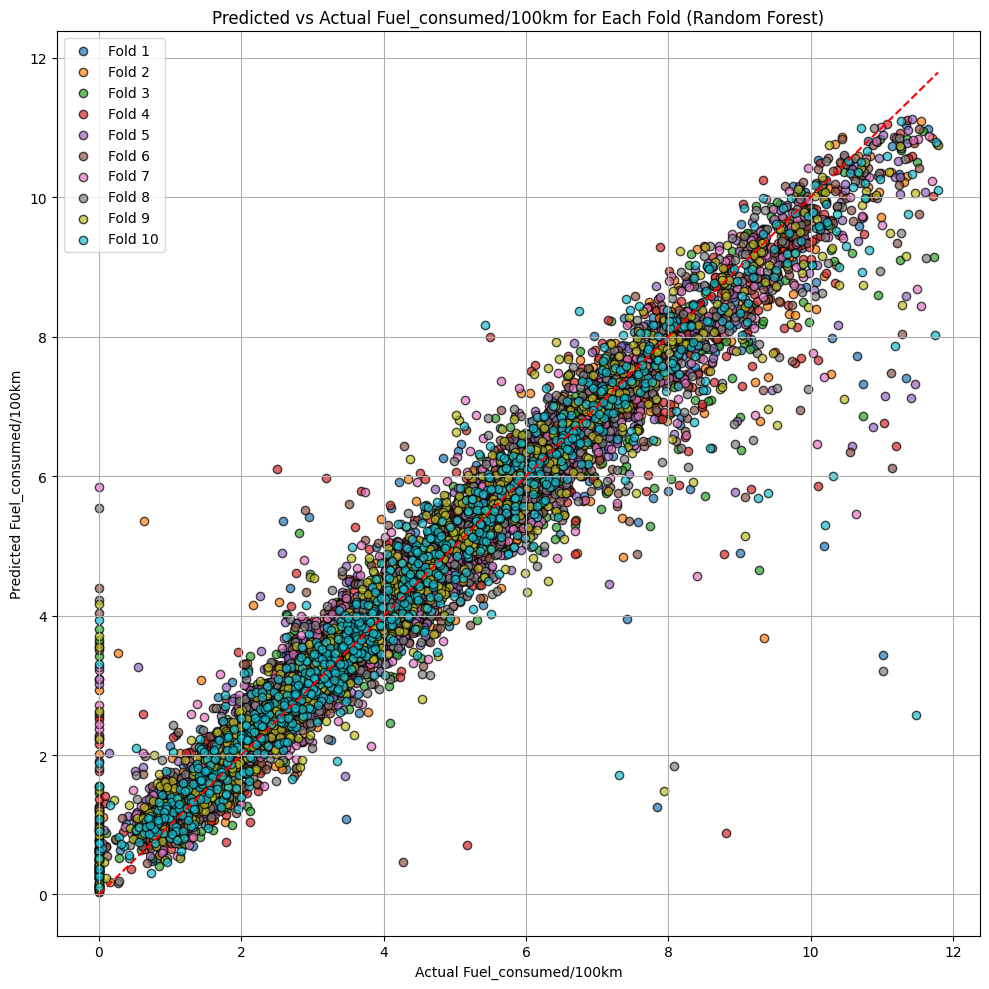


MAE: 0.3803 ± 0.0145
R2: 0.9388 ± 0.0065
RMSE: 0.6239 ± 0.0378


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, make_scorer

# Assuming X is a pandas DataFrame and y is a pandas Series or DataFrame
# Use your pre-existing model
model = best_rf_model

# Define the cross-validation strategy
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store the actual and predicted values for each fold
actual_values = []
predicted_values = []

# Lists to store metrics for each fold
mae_scores = []
r2_scores = []
rmse_scores = []

# Perform cross-validation and store predictions
fold = 1
for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    actual_values.append(y_test)
    predicted_values.append(y_pred)

    # Calculate and store metrics for each fold
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    mae_scores.append(mae)
    r2_scores.append(r2)
    rmse_scores.append(rmse)

    # Print fold scores
    print(f"Fold {fold}: MAE = {mae:.4f}, R2 = {r2:.4f}, RMSE = {rmse:.4f}")
    fold += 1

# Convert lists of arrays into single arrays
actual_values = np.concatenate(actual_values)
predicted_values = np.concatenate(predicted_values)

# Plotting Predicted vs Actual
plt.figure(figsize=(10, 10))

# Assign a different color to each fold
colors = plt.cm.tab10(np.linspace(0, 1, 10))

for i in range(10):
    start_index = i * (len(actual_values) // 10)
    end_index = (i + 1) * (len(actual_values) // 10)
    plt.scatter(actual_values[start_index:end_index], predicted_values[start_index:end_index], color=colors[i], edgecolor='k', alpha=0.7, label=f'Fold {i + 1}')

plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'r--')  # Ideal line
plt.xlabel('Actual Fuel_consumed/100km')
plt.ylabel('Predicted Fuel_consumed/100km')
plt.title('Predicted vs Actual Fuel_consumed/100km for Each Fold (Random Forest)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



# Print the mean and standard deviation of the scores
print(f"\nMAE: {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")
print(f"R2: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")
print(f"RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")


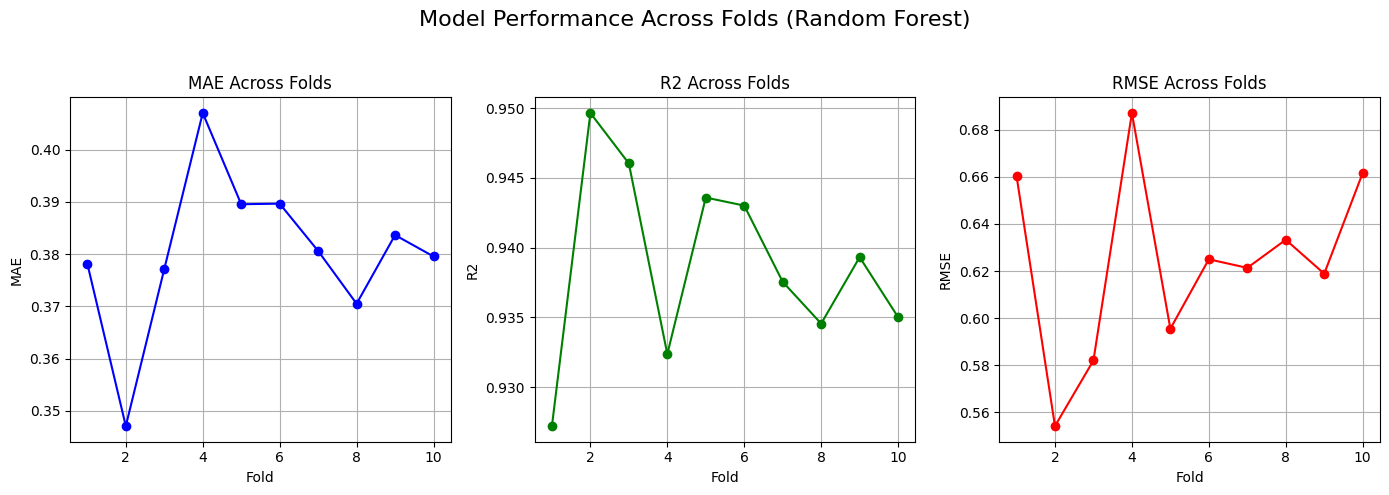

In [59]:
# Fold numbers
folds = np.arange(1, 11)

plt.figure(figsize=(14, 5))

# MAE
plt.subplot(1, 3, 1)
plt.plot(folds, mae_scores, marker='o', color='b')
plt.title('MAE Across Folds')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.grid(True)

# R2
plt.subplot(1, 3, 2)
plt.plot(folds, r2_scores, marker='o', color='g')
plt.title('R2 Across Folds')
plt.xlabel('Fold')
plt.ylabel('R2')
plt.grid(True)

# RMSE
plt.subplot(1, 3, 3)
plt.plot(folds, rmse_scores, marker='o', color='r')
plt.title('RMSE Across Folds')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.grid(True)

# Add a grand title
plt.suptitle('Model Performance Across Folds (Random Forest)', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect parameter to fit the suptitle
plt.show()

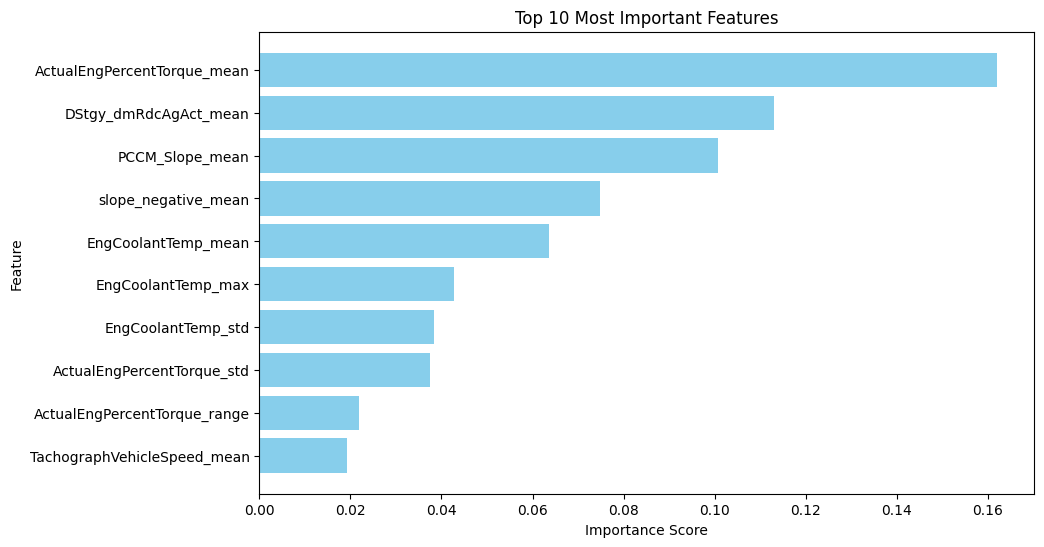

In [69]:
import matplotlib.pyplot as plt

# Get feature importances from the trained RF model
importance = best_rf_model.feature_importances_

# Get feature names from the DataFrame columns
feature_names = X.columns.tolist()

# Sort the feature importances
importance_sorted = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)

# Select the top 10 features
top_10_features = importance_sorted[:10]

# Separate the features and their importance scores
features = [x[0] for x in top_10_features]
scores = [x[1] for x in top_10_features]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(features, scores, color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()



TypeError: unhashable type: 'numpy.ndarray'

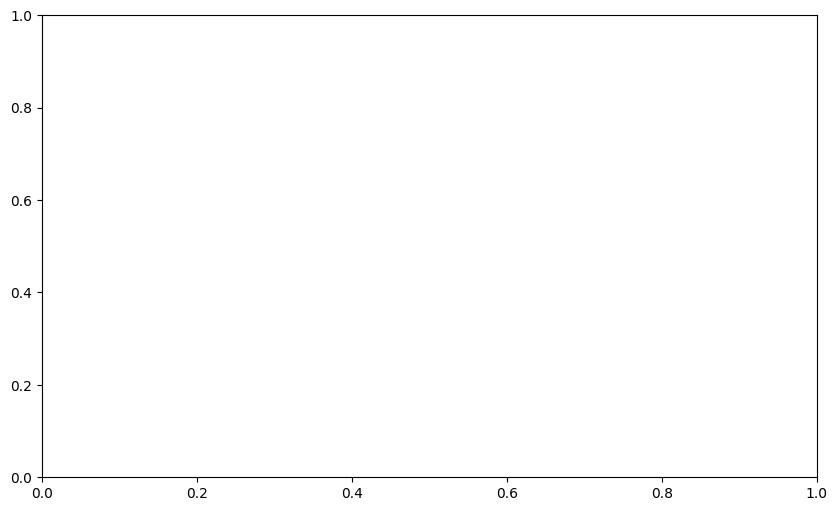

In [60]:
# Get feature names from the DataFrame columns
feature_names = X.columns.tolist()

# Sort the feature importances
importance_sorted = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)

# Select the top 10 features
top_10_features = importance_sorted[:10]

# Separate the features and their importance scores
features = [x[0] for x in top_10_features]
scores = [x[1] for x in top_10_features]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(features, scores, color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features (Random Forest)')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


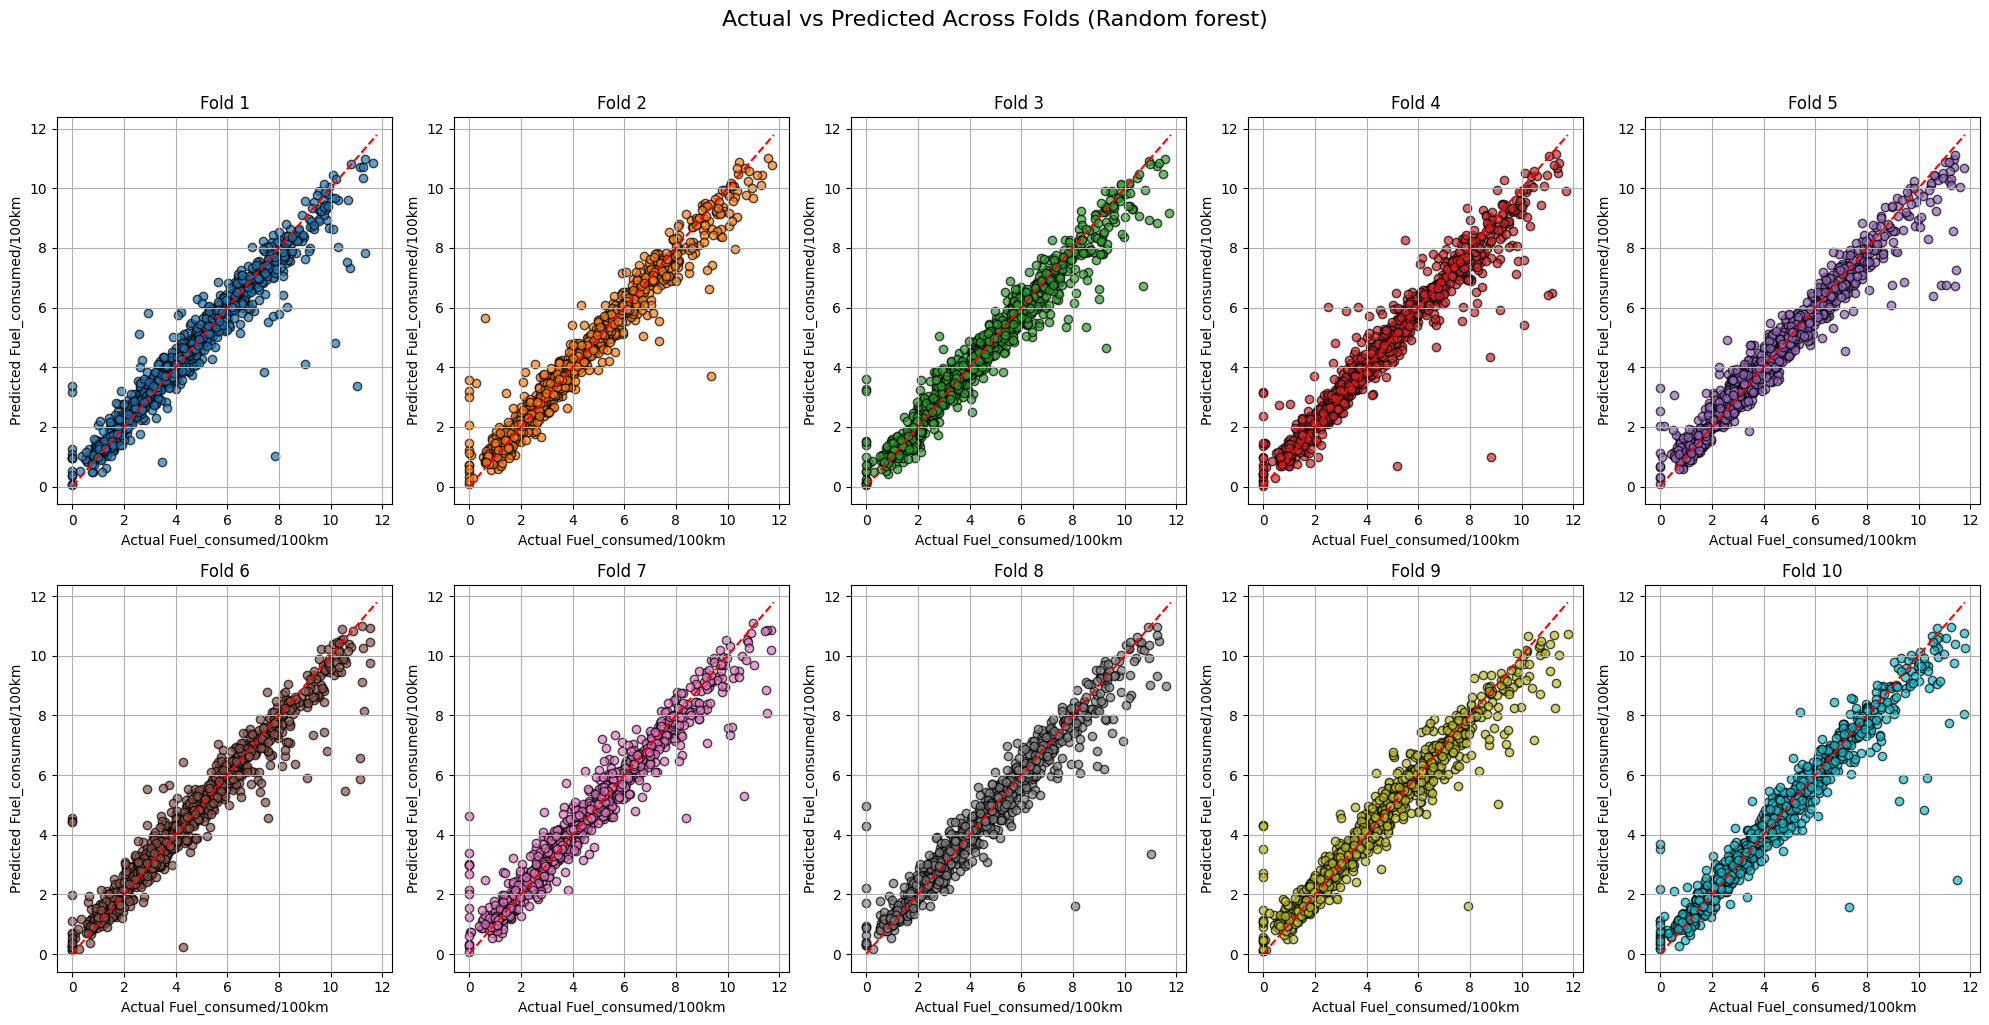

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming actual_values and predicted_values are defined and contain the data
# Example:
# actual_values = np.random.rand(100) * 100  # Replace with your actual values
# predicted_values = np.random.rand(100) * 100  # Replace with your predicted values

fig, axs = plt.subplots(2, 5, figsize=(20, 10))
axs = axs.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

colors = plt.cm.tab10(np.linspace(0, 1, 10))

for i in range(10):
    start_index = i * (len(actual_values) // 10)
    end_index = (i + 1) * (len(actual_values) // 10)
    axs[i].scatter(actual_values[start_index:end_index], predicted_values[start_index:end_index], color=colors[i], edgecolor='k', alpha=0.7)
    axs[i].plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'r--')  # Ideal line
    axs[i].set_xlabel('Actual Fuel_consumed/100km')
    axs[i].set_ylabel('Predicted Fuel_consumed/100km')
    axs[i].set_title(f'Fold {i + 1}')
    axs[i].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout to make space for the suptitle
plt.suptitle('Actual vs Predicted Across Folds (Random forest)', fontsize=16, y=1.02)  # Adjust y for better positioning
plt.show()